<a href="https://colab.research.google.com/github/Redwolf0023/AutoMLvsBayesian/blob/main/Winequality_H2O_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download and install the dependencies for H2O
!sudo apt-get install swig -y
!pip install Cython numpy
!pip install scikit-learn
!apt-get install default-jre
!java -version
!pip install h2o

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (1,687 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline


In [ ]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from h2o.estimators import H2OTargetEncoderEstimator

In [ ]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
# initialise the cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpo3zwzjta
  JVM stdout: /tmp/tmpo3zwzjta/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpo3zwzjta/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         08 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    3 days
H2O_cluster_name:           H2O_from_python_unknownUser_6pwyjf
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
target_col = df.columns[-1]
feature_col = df.columns[:-1]
df[target_col] = df[target_col].asfactor()

In [ ]:
train, test, validation = df.split_frame(ratios=[0.8, 0.15], seed = 12)

In [ ]:
# train the H2O model
model = H2OAutoML(max_models=20, seed = 1234)
model.train(x = feature_col, y = target_col, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_184438


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       6/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06996779907980422
RMSE: 0.2645142700872757
LogLoss: 0.26163785624925484
Null degrees of freedom: 1279
Residual degrees of freedom: 1177
Null deviance: 3044.4765574915496
Residual deviance: 669.7929119980924
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
3    4    5    6    7    8    Error       Rate
---  ---  ---  ---  ---  ---  ----------  ----------
0    7    0    1    0    0    1           8 / 8
3    5    30   6    3    0    0.893617    42 / 47
0    2    540  1    0    0    0.00552486  3 / 543
0    0    0    501  11   0    0.0214844   11 / 512
0    0    0    2    154  0    0.0128205   2 / 156
0    0    0    5    9    0    1           14 / 14
3    14   570  516  177  0    0.0625      80 / 1,280

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.9375
2    0.957812
3    0.978906
4    0.992969
5    1
6    1

ModelMetricsMultinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.2528710644837827
RMSE: 0.5028628684679182
LogLoss: 0.7805633963694617
Null degrees of freedom: 1279
Residual degrees of freedom: 1178
Null deviance: 3052.7951381464086
Residual deviance: 1998.242294705822
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
3    4    5    6    7    8    Error     Rate
---  ---  ---  ---  ---  ---  --------  -----------
0    2    4    2    0    0    1         8 / 8
0    3    28   15   1    0    0.93617   44 / 47
0    2    426  113  2    0    0.21547   117 / 543
0    1    109  369  33   0    0.279297  143 / 512
0    0    7    64   85   0    0.455128  71 / 156
0    0    0    8    6    0    1         14 / 14
0    8    574  571  127  0    0.310156  397 / 1,280

Top-6 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.689844
2    0.913281
3    0.972656
4    0.989062
5    0.998437
6    1

Cross-Validation Metrics Summary: 
                         mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.692761  0.0119715  0.703846      0.700375      0.696         0.673387      0.690196
auc                      nan       0          nan           nan           nan           nan           nan
err                      0.307239  0.0119715  0.296154      0.299625      0.304         0.326613      0.309804
err_count       

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   mean_per_class_error    logloss      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ----------------------  ---------  --------  --------  ------------------  -------------------------  ---------------
GBM_3_AutoML_1_20230825_184438                                         0.443129   0.876302  0.528878  0.279712                1028                   0.177001  GBM
DRF_1_AutoML_1_20230825_184438                                         0.443881   0.92129   0.5213    0.271754                3461                   0.470635  DRF
StackedEnsemble_AllModels_1_AutoML_1_20230825_184438                   0.452018   0.820879  0.52382   0.274388               69718                   1.20646   StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_184438                0.458308   0.84874   0.525708  0.276369               36654                   0.673951  StackedEnsemble
XRT_1_AutoML_1_20230825_184438                                         0.470181   1.02563   0.518822  0.269176                4864                   0.351665  DRF
GBM_4_AutoML_1_20230825_184438                                         0.471445   0.877545  0.52845   0.27926                 1023                   0.285901  GBM
GBM_grid_1_AutoML_1_20230825_184438_model_1                            0.473703   0.853028  0.522704  0.27322                 1138                   0.251545  GBM
GBM_5_AutoML_1_20230825_184438                                         0.483137   0.896605  0.534911  0.286129                1682                   0.179865  GBM
GBM_2_AutoML_1_20230825_184438                                         0.484265   0.876868  0.531457  0.282446                1406                   0.251108  GBM
XGBoost_grid_1_AutoML_1_20230825_184438_model_3                        0.487095   0.883153  0.537528  0.288936                 956                   0.125001  XGBoost
XGBoost_2_AutoML_1_20230825_184438                                     0.491085   0.908303  0.540681  0.292336                 751                   0.02765   XGBoost
XGBoost_3_AutoML_1_20230825_184438                                     0.491906   0.899996  0.535214  0.286454                 589                   0.03122   XGBoost
GBM_grid_1_AutoML_1_20230825_184438_model_2                            0.497086   0.876491  0.541952  0.293712                1029                   0.280538  GBM
GLM_1_AutoML_1_20230825_184438                                         0.5079     0.947866  0.56317   0.31716                 1686                   0.005468  GLM
XGBoost_grid_1_AutoML_1_20230825_184438_model_2                        0.522991   0.913114  0.558848  0.312311                 449                   0.019432  XGBoost
XGBoost_1_AutoML_1_20230825_184438                                     0.525866   0.883357  0.542614  0.29443                 5034                   0.061706  XGBoost
DeepLearning_grid_3_AutoML_1_20230825_184438_model_1                   0.536143   1.05826   0.57091   0.325938               34561                   0.11516   DeepLearning
DeepLearning_1_AutoML_1_20230825_184438                                0.537521   1.01964   0.583846  0.340876                 210                   0.009135  DeepLearning
DeepLearning_grid_1_AutoML_1_20230825_184438_model_1                   0.54309    1.16887   0.567752  0.322342               20064                   0.011548  DeepLearning
DeepLearning_grid_2_AutoML_1_20230825_184438_model_1                   0.544731   1.0265    0.567351  0.321887               26220                   0.058236  DeepLearning
[20 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_184438

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
3    4    5    6    7    8    Error     Rate
---  ---  ---  ---  ---  ---  --------  --------
0    0    0    0    0    0    nan       0 / 0
0    2    3    1    0    0    0.666667  4 / 6
0    2    79   25   0    0    0.254717  27 / 106
0    1    22   71   6    0    0.29      29 / 100
0    0    1    20   18   0    0.538462  21 / 39
0    0    0    3    1    0    1         4 / 4
0    5    105  120  25   0    0.333333  85 / 255

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

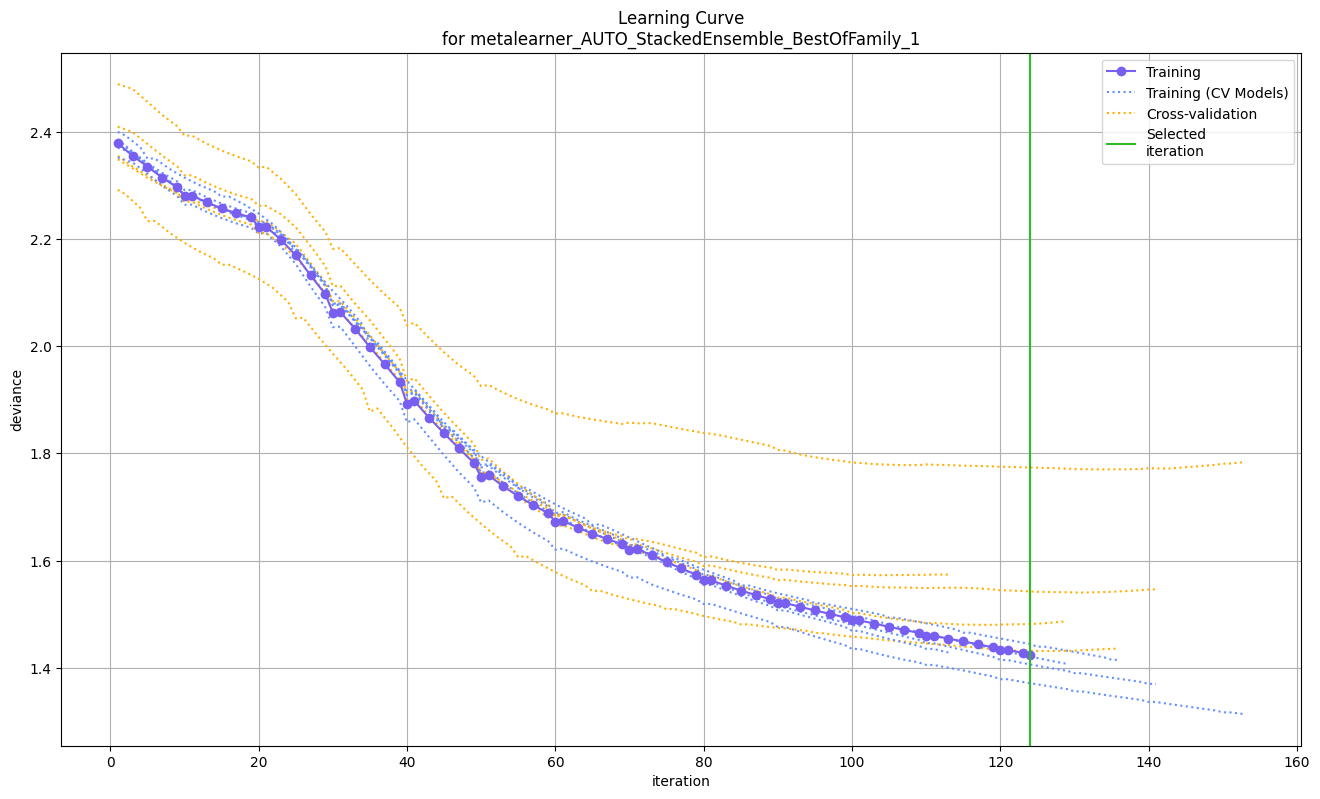

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

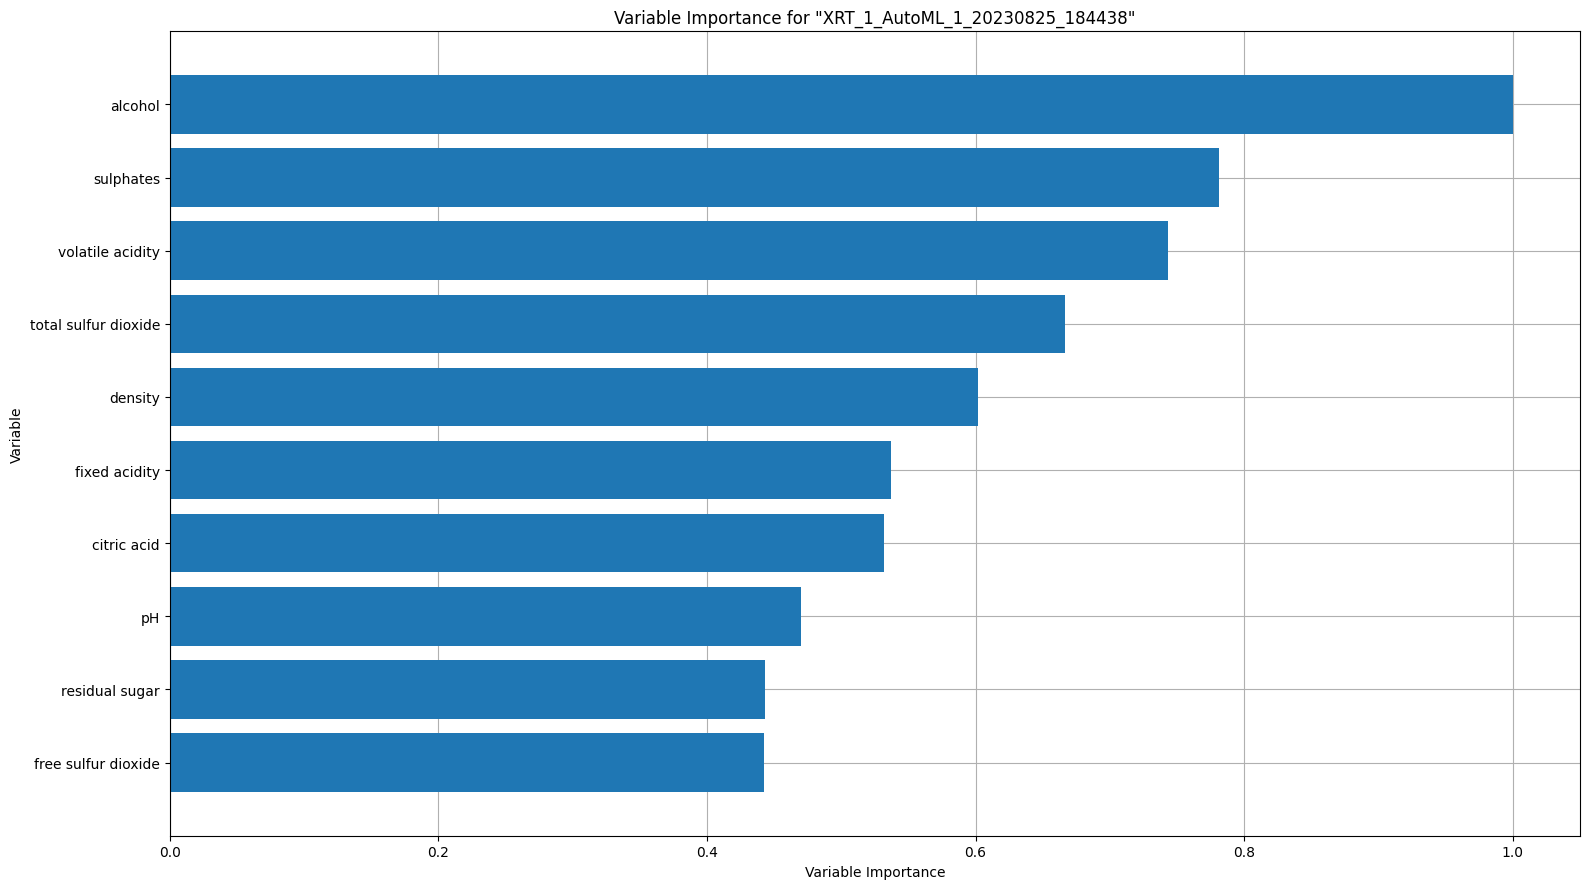

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

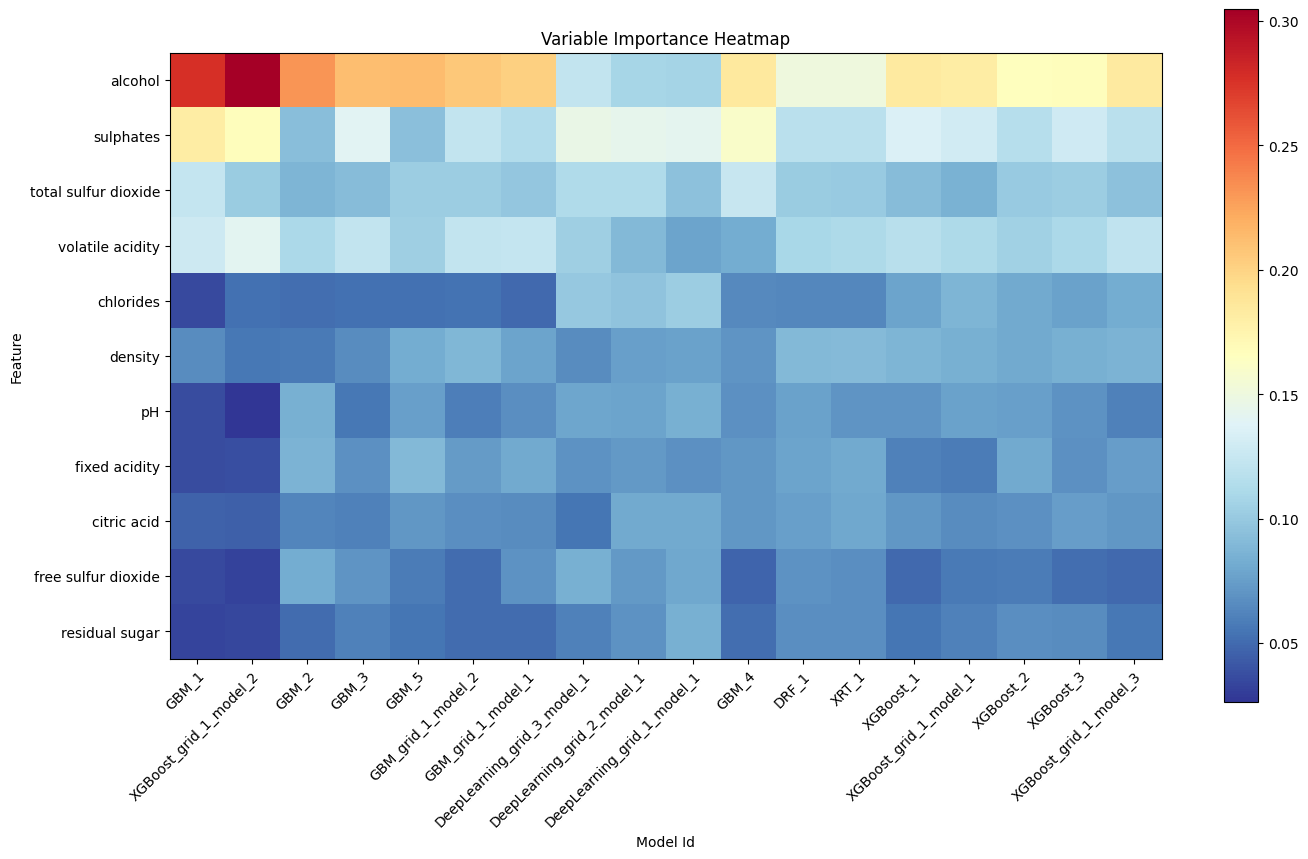

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

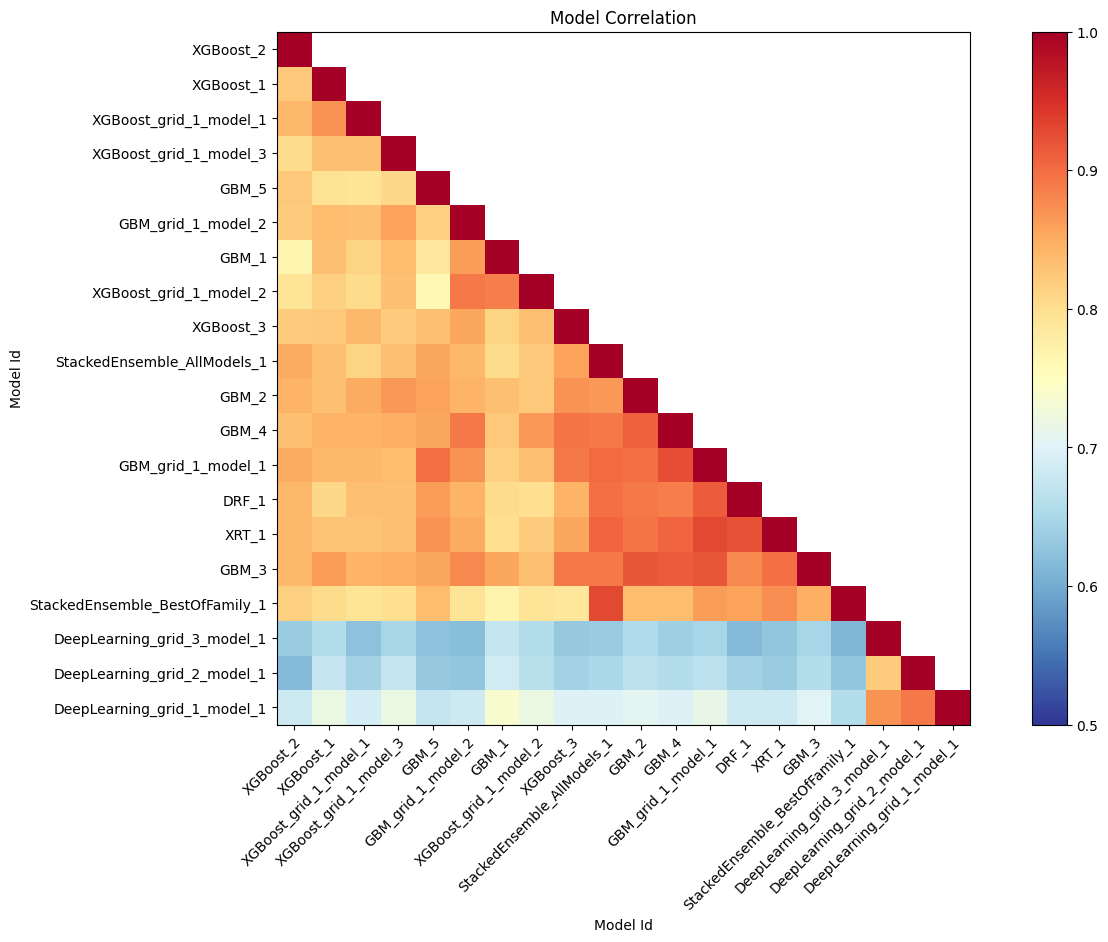

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

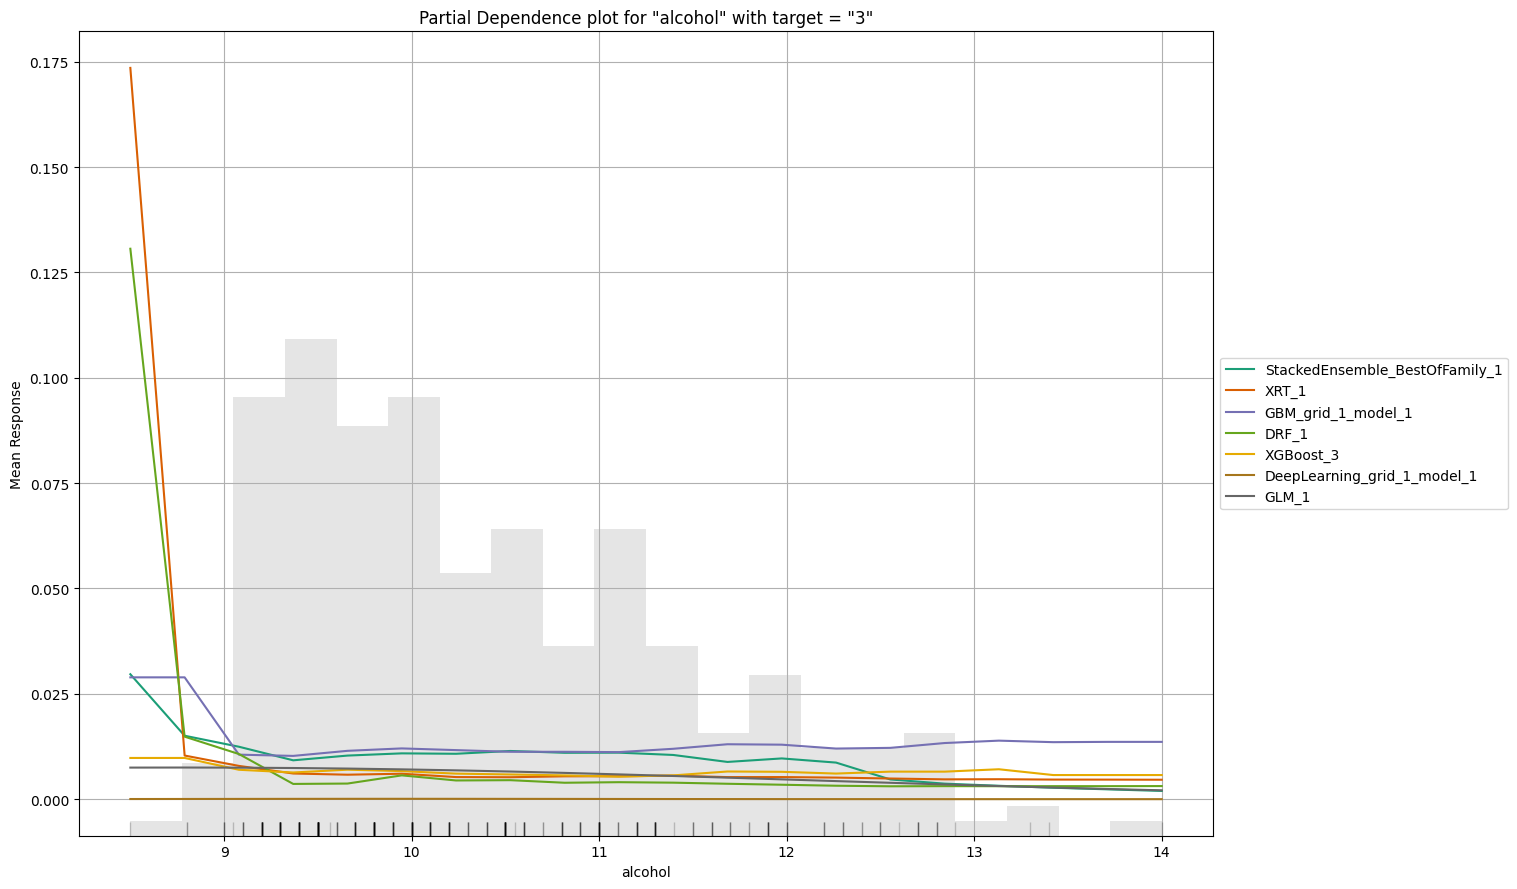

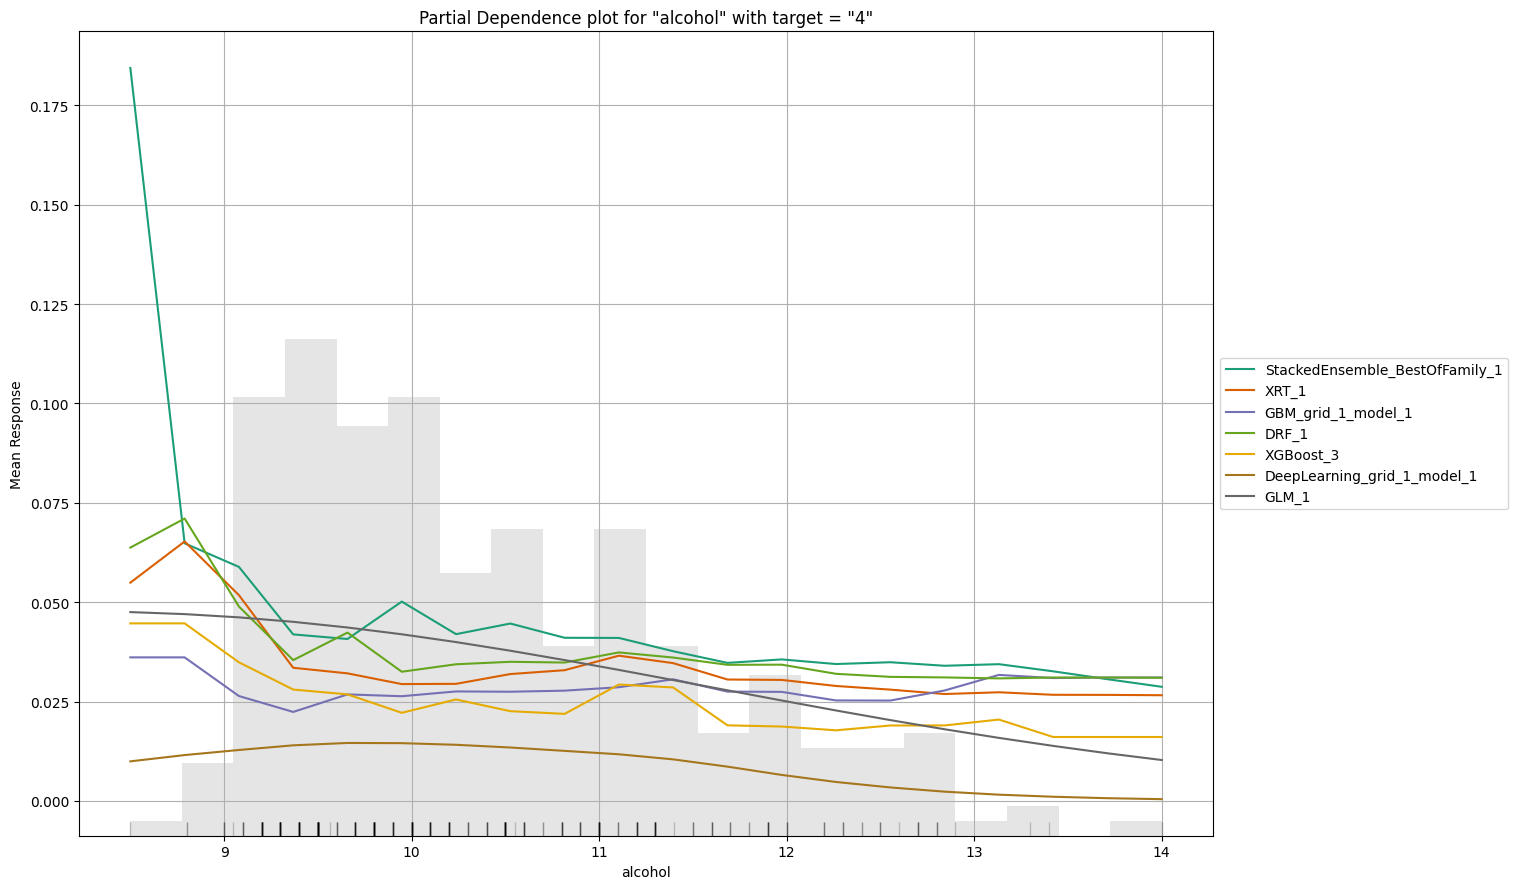

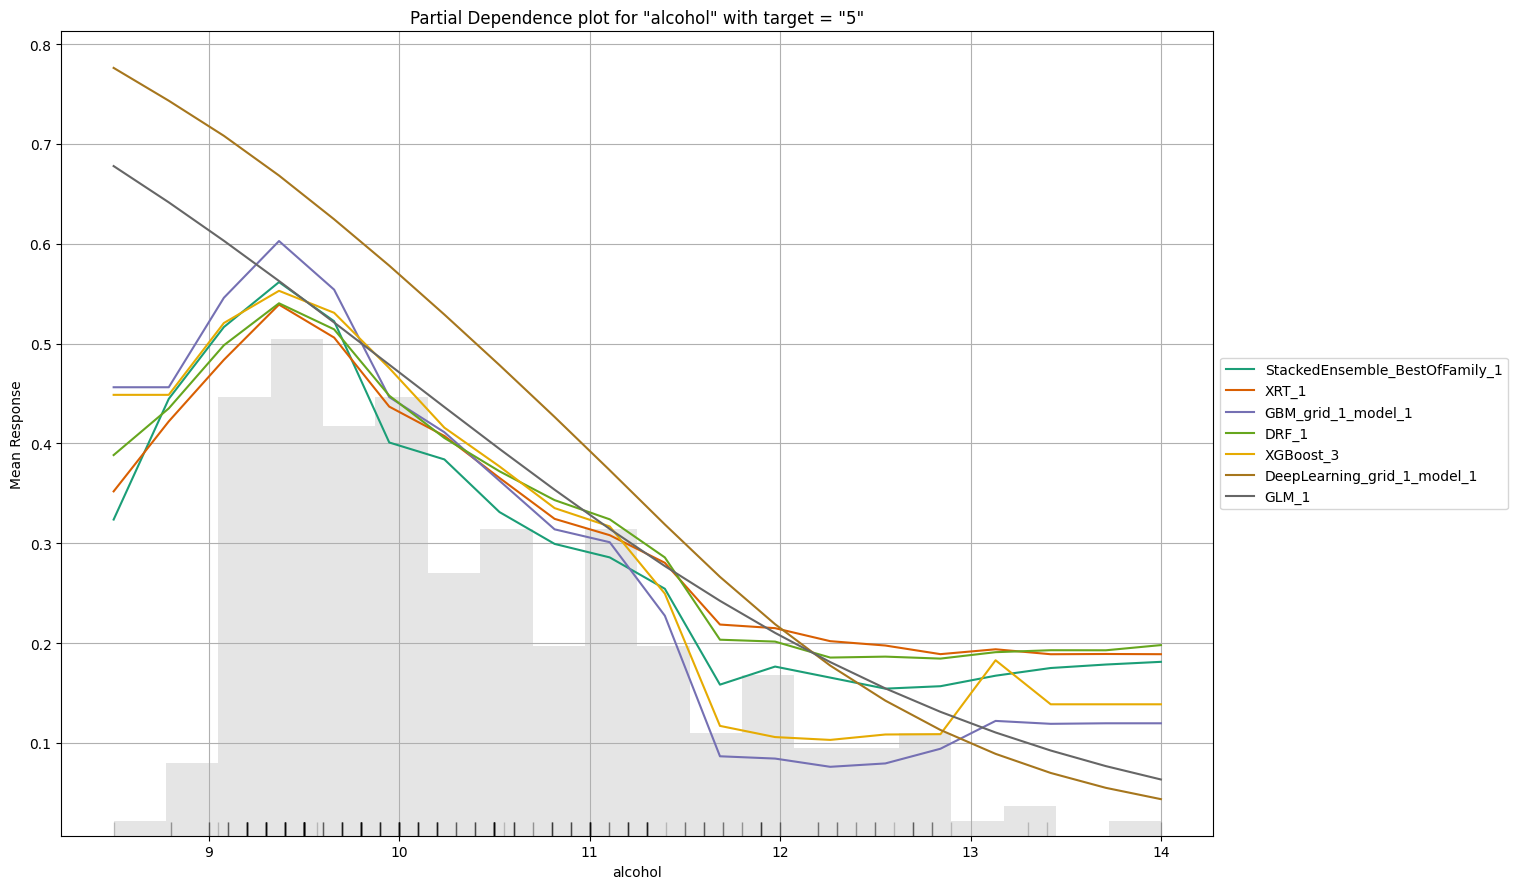

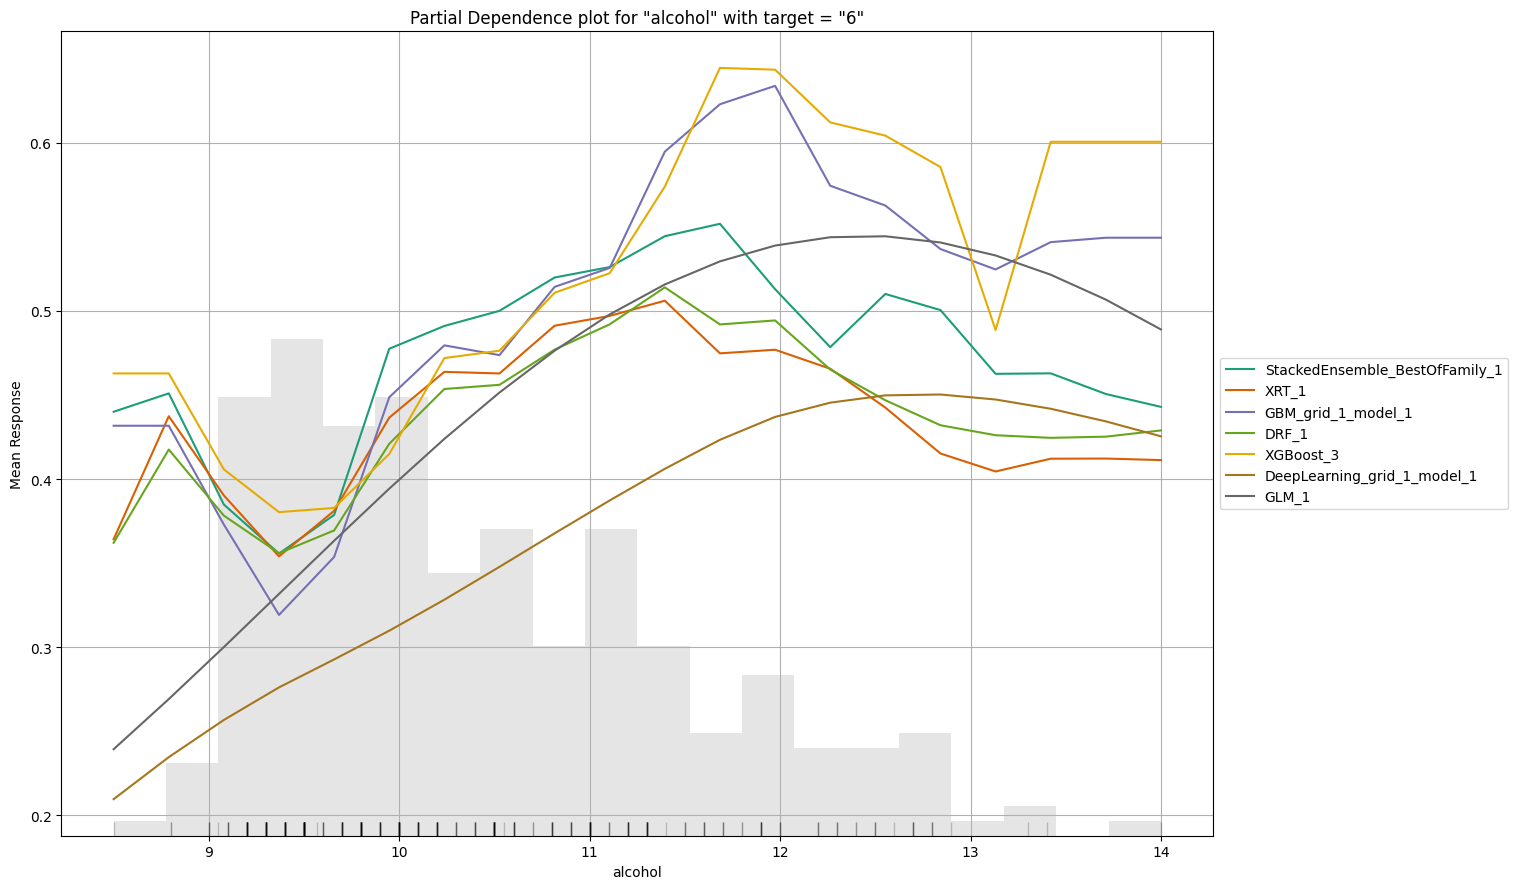

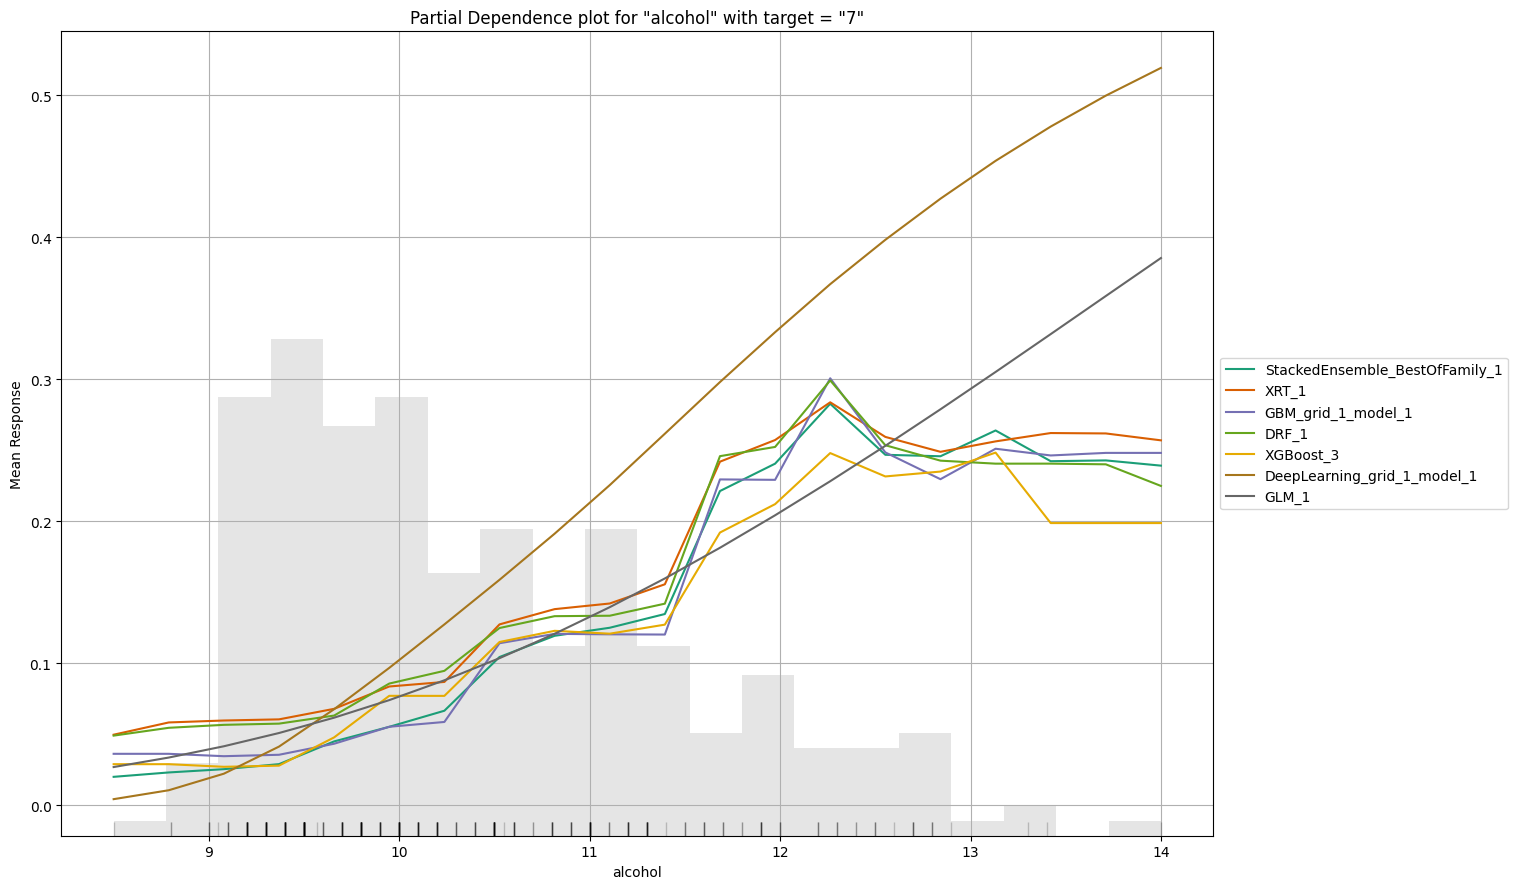

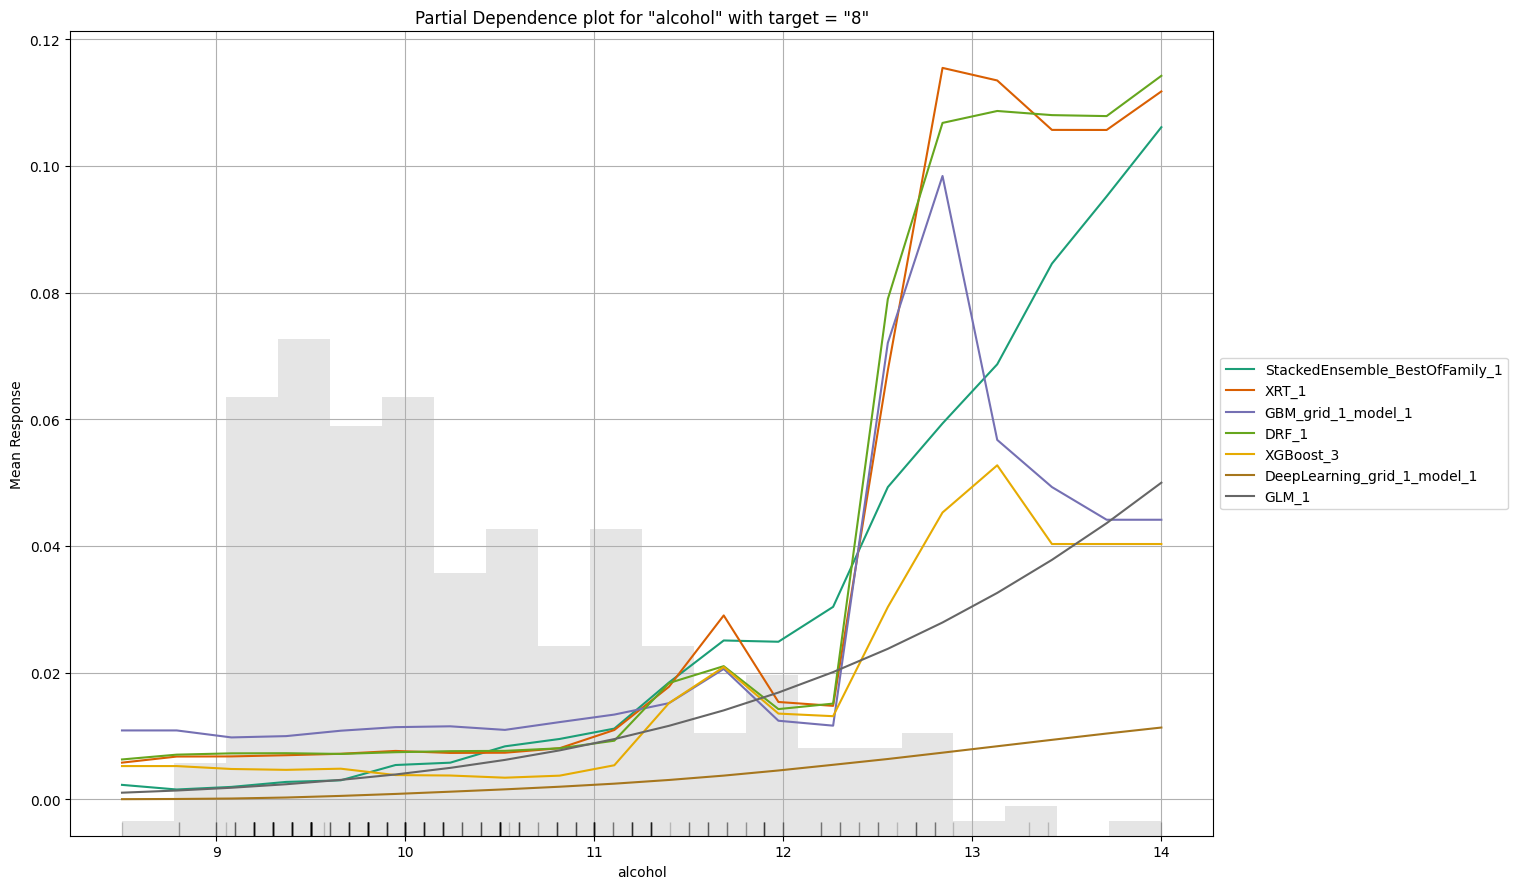

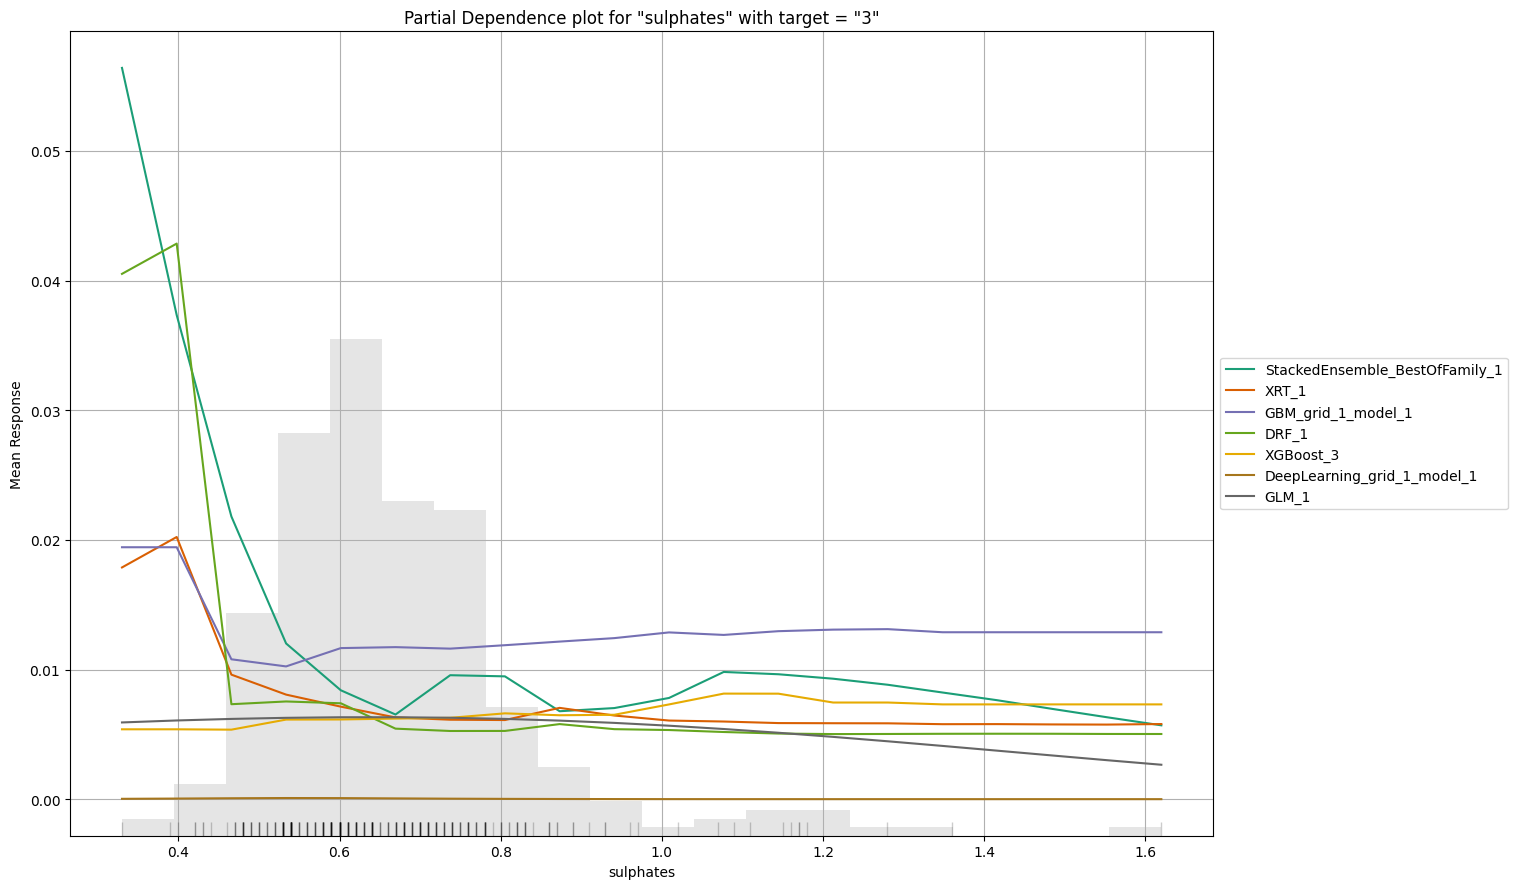

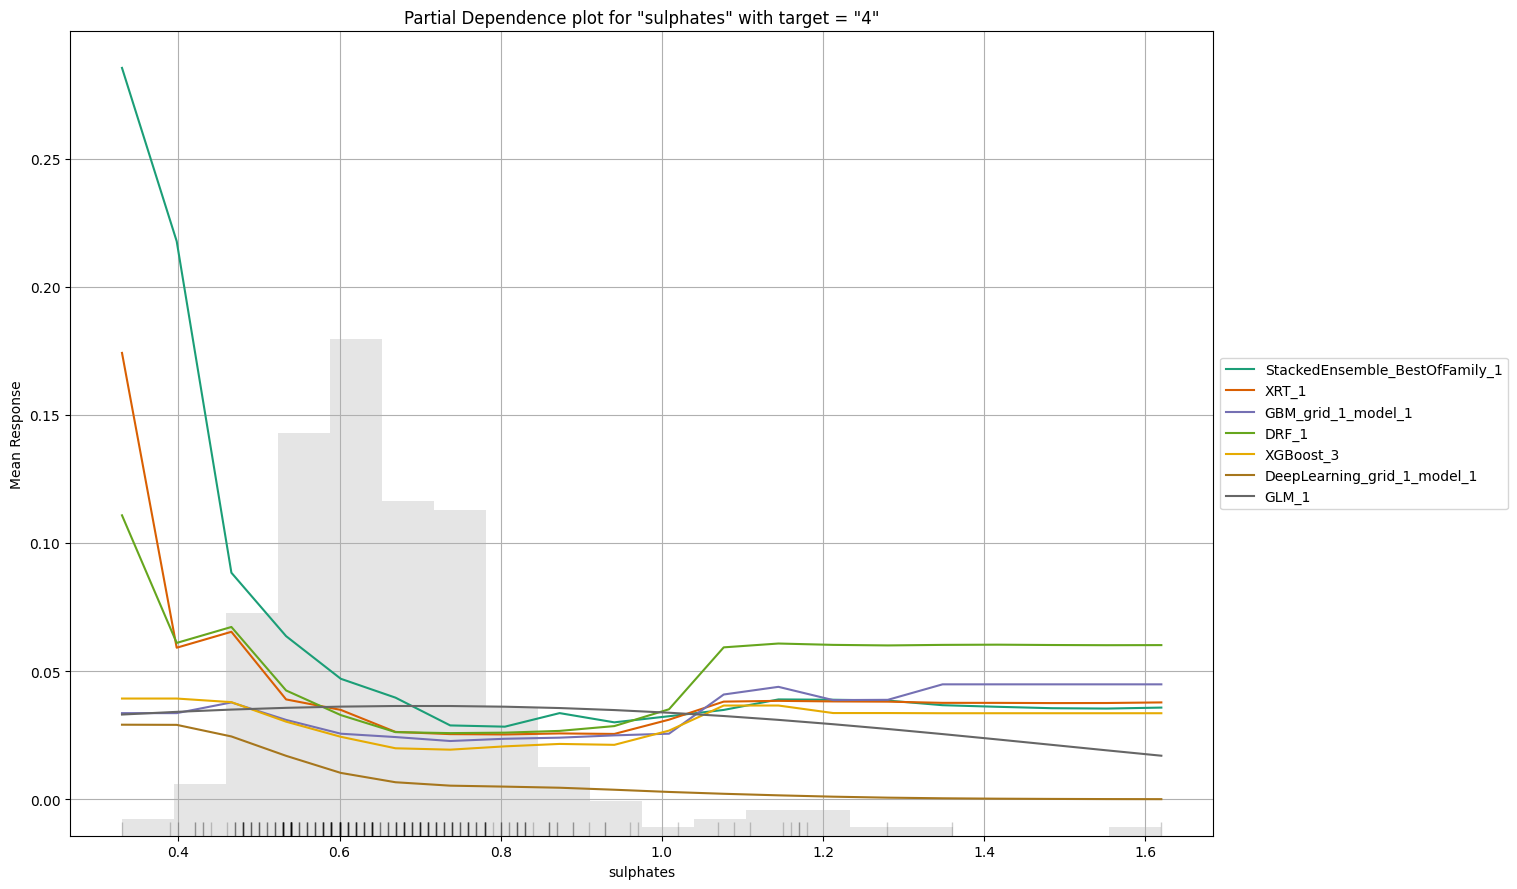

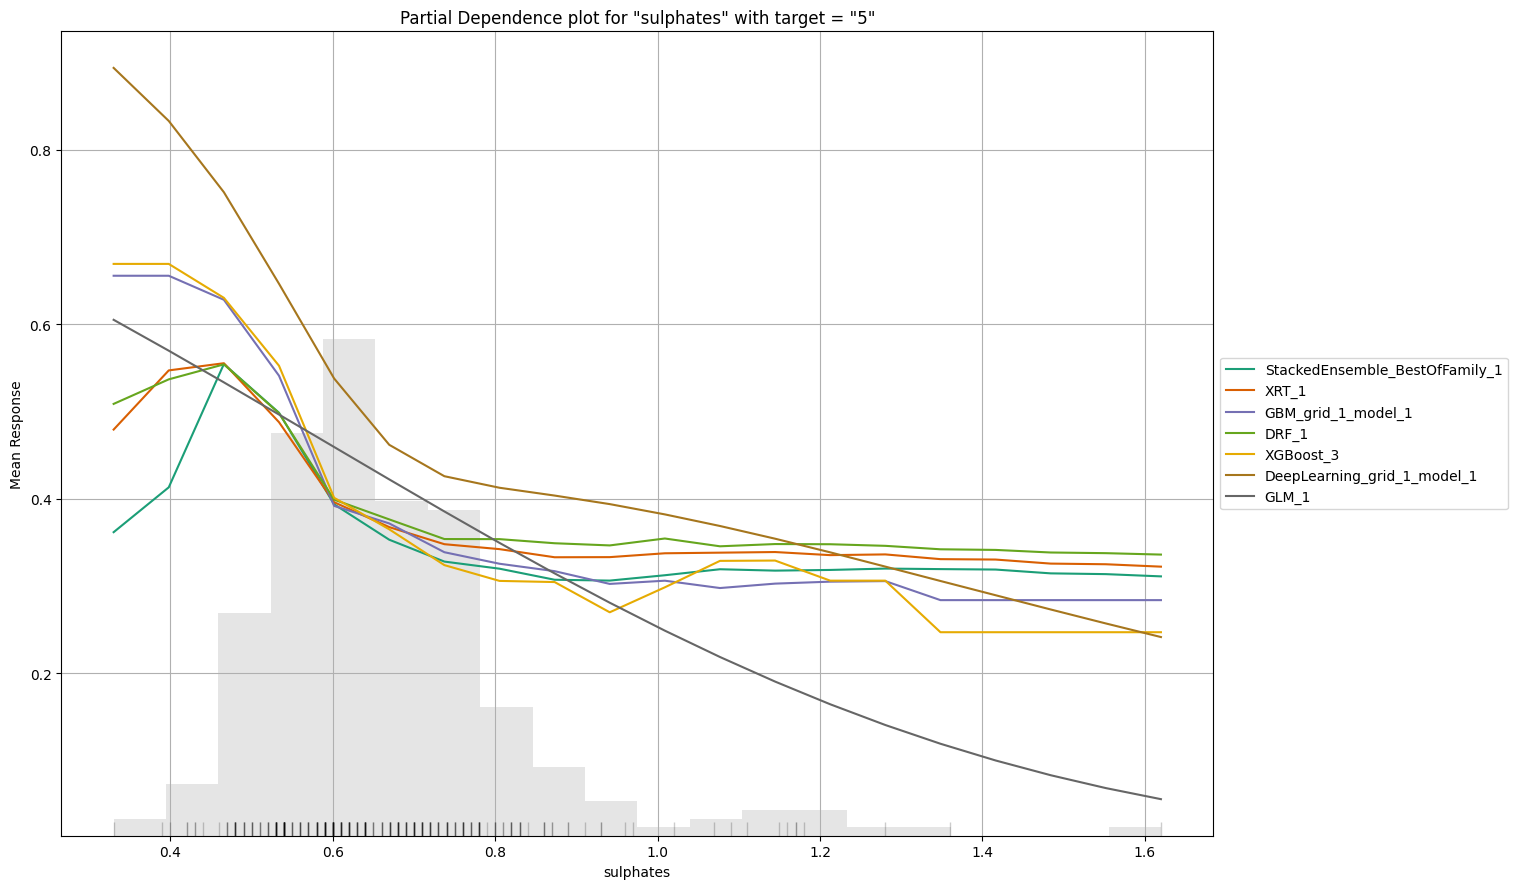

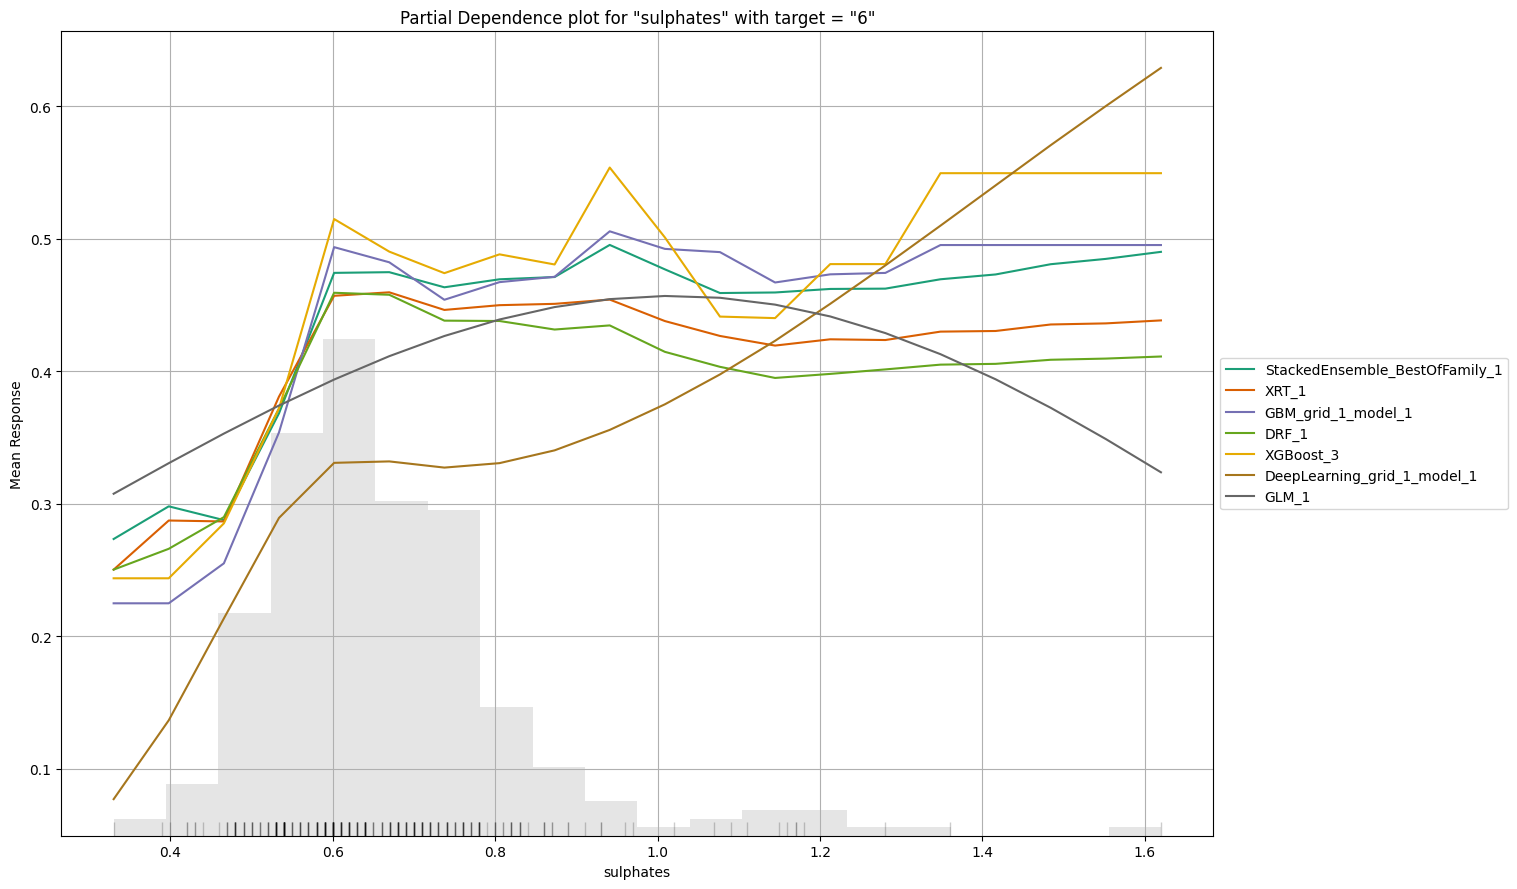

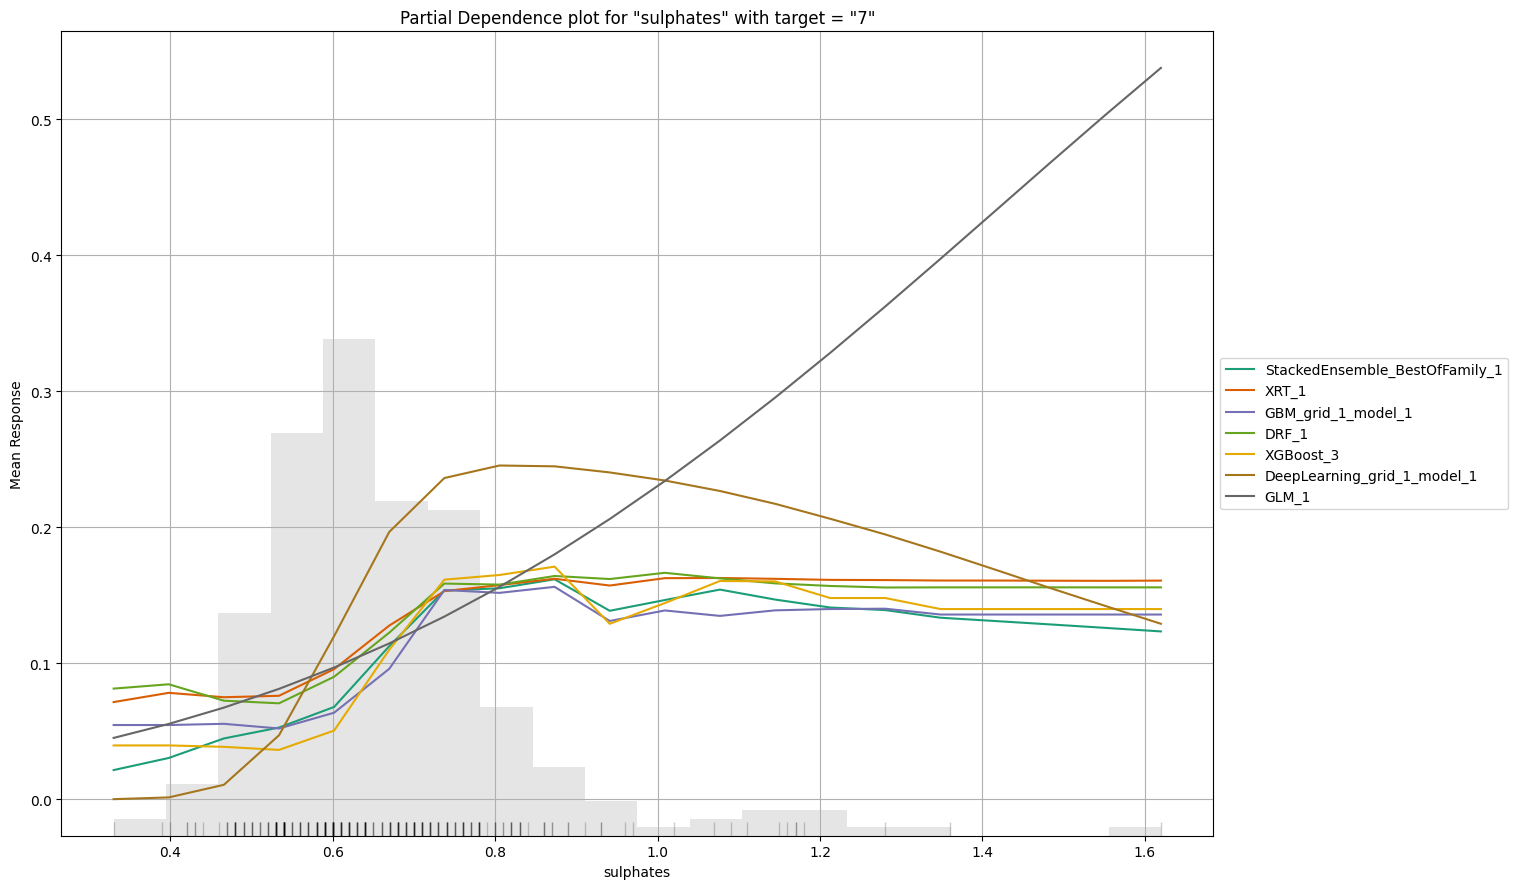

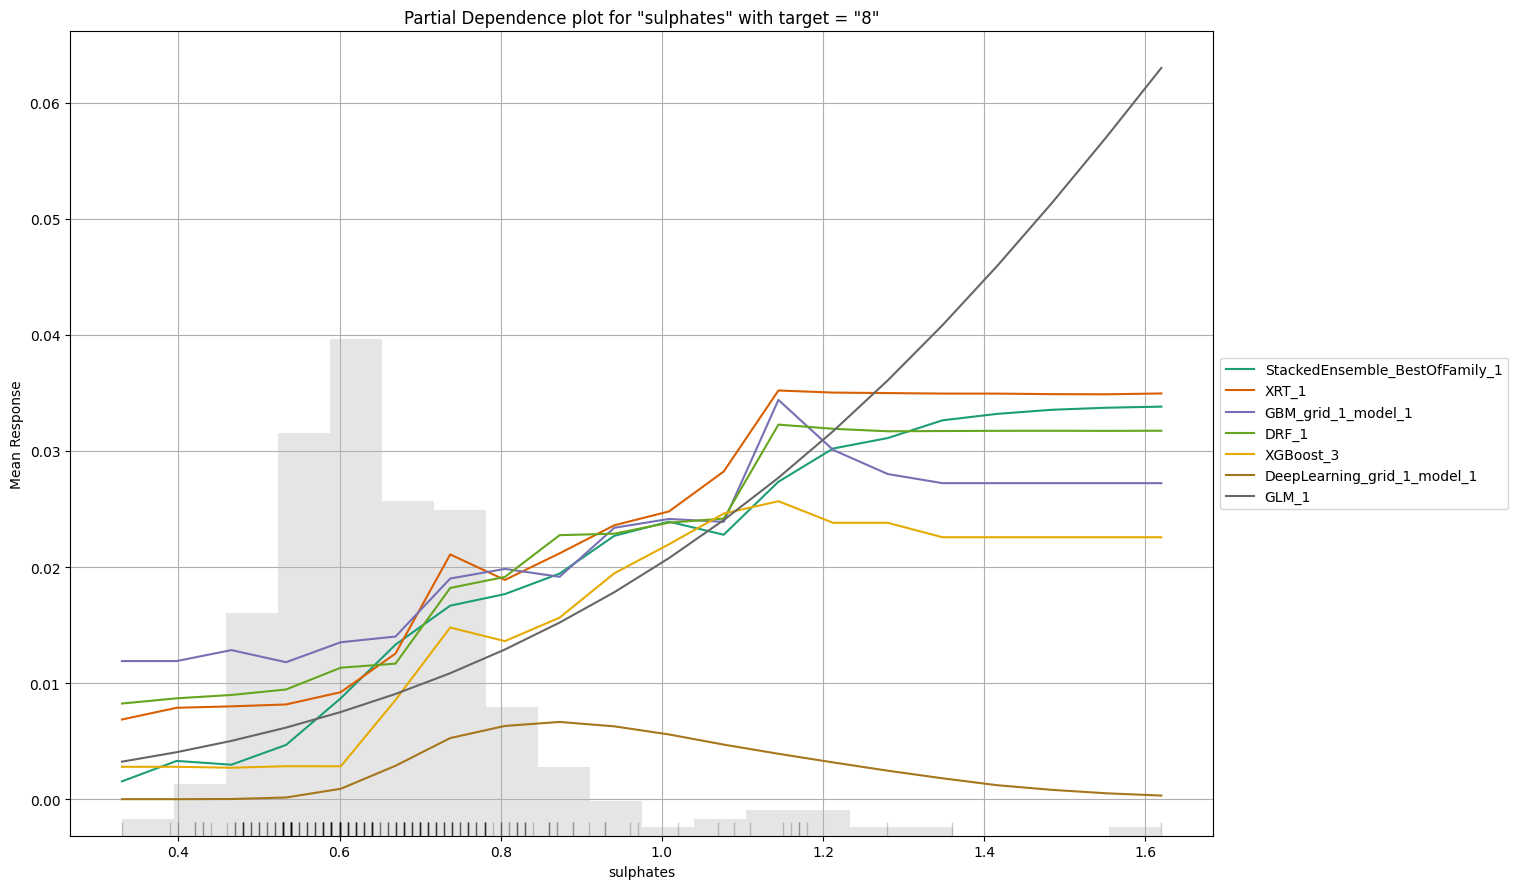

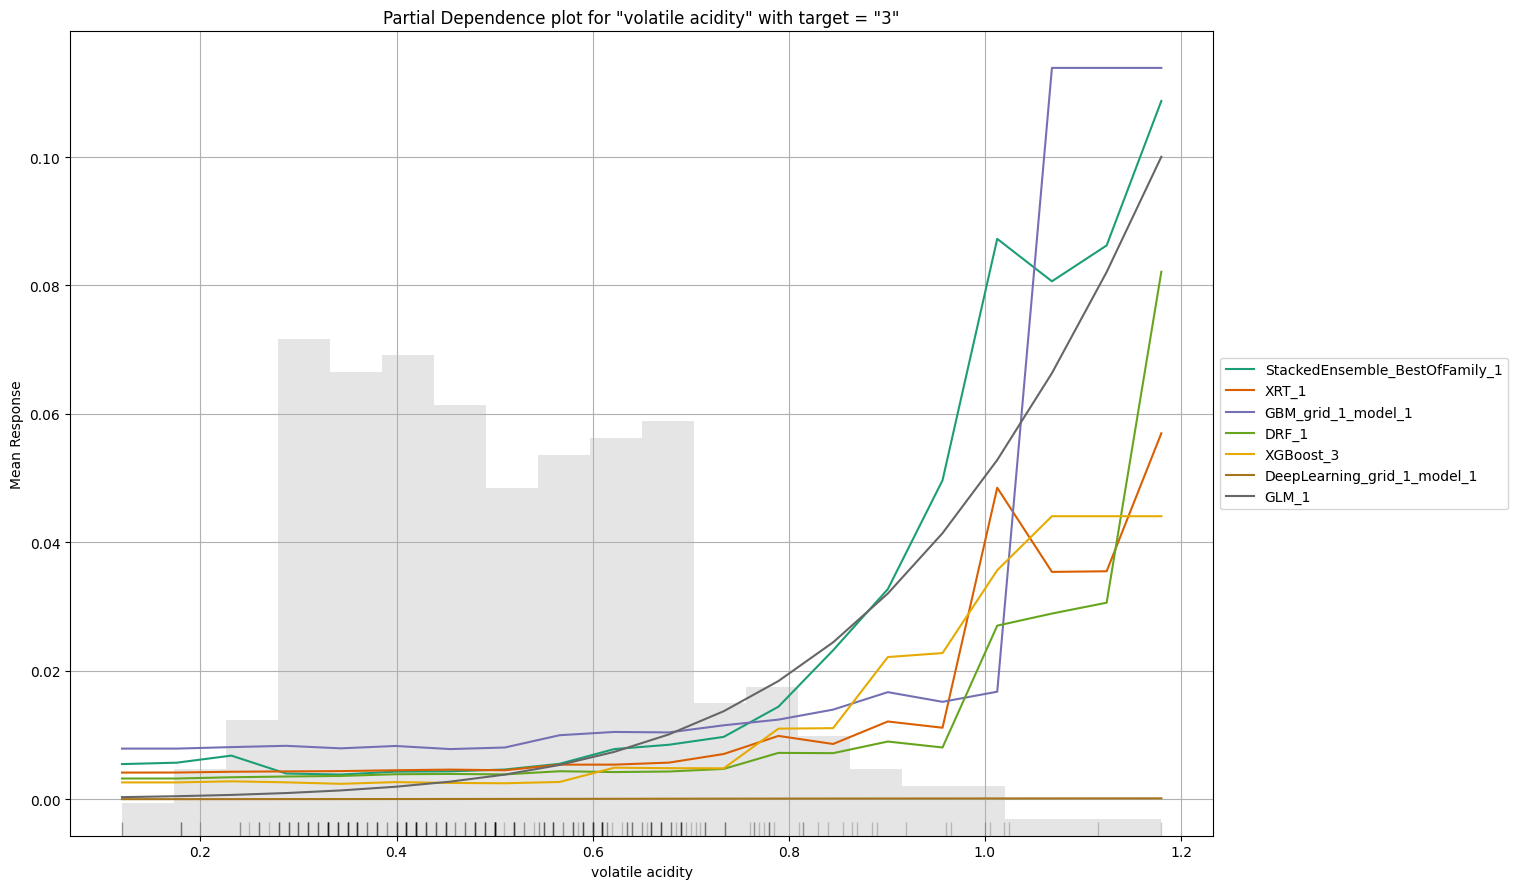

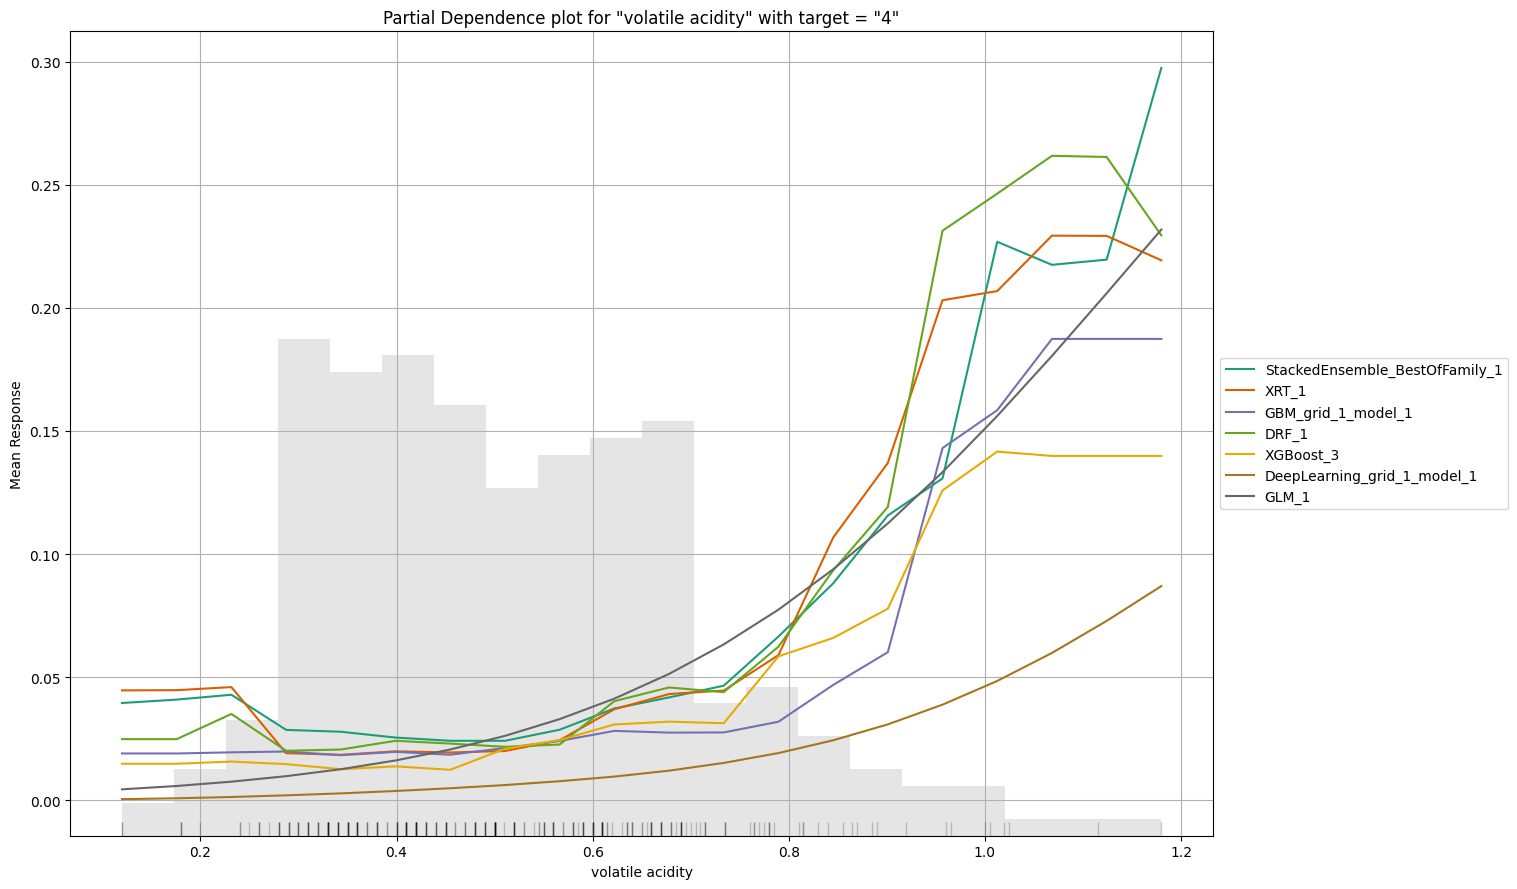

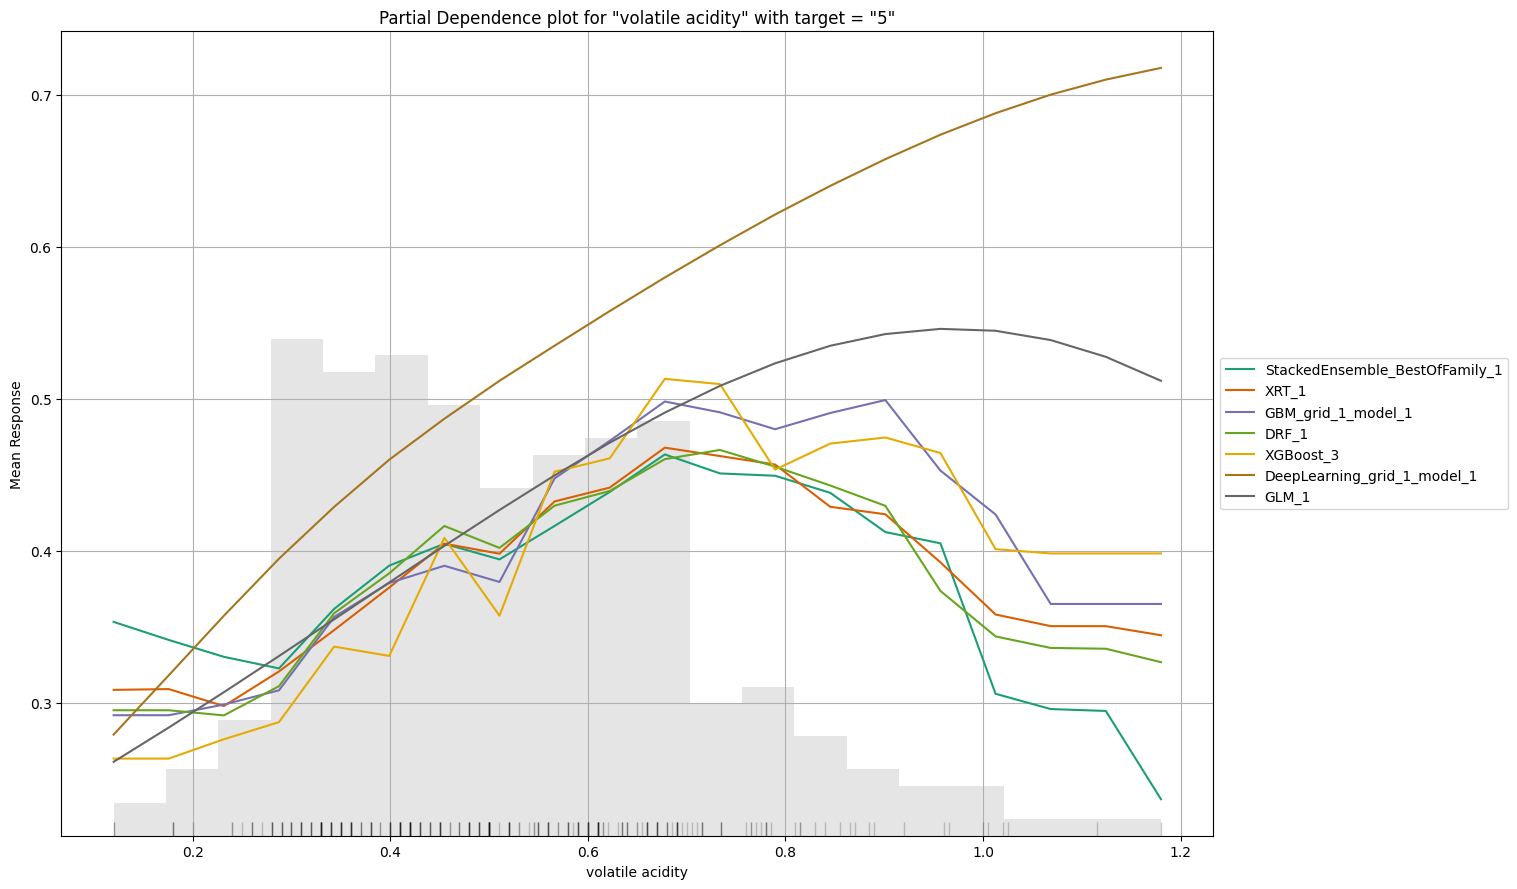

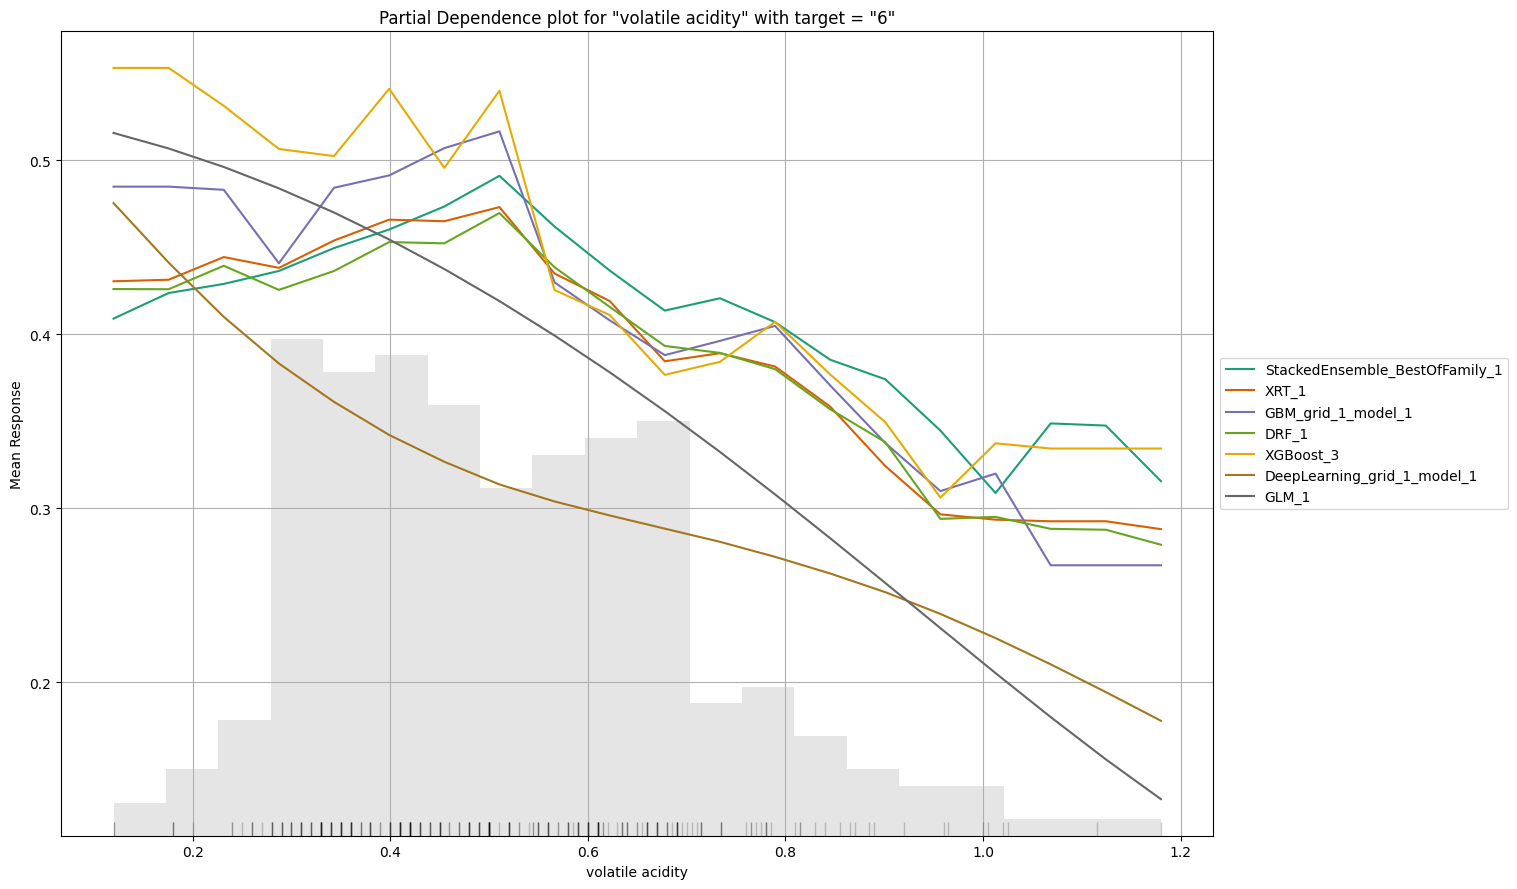

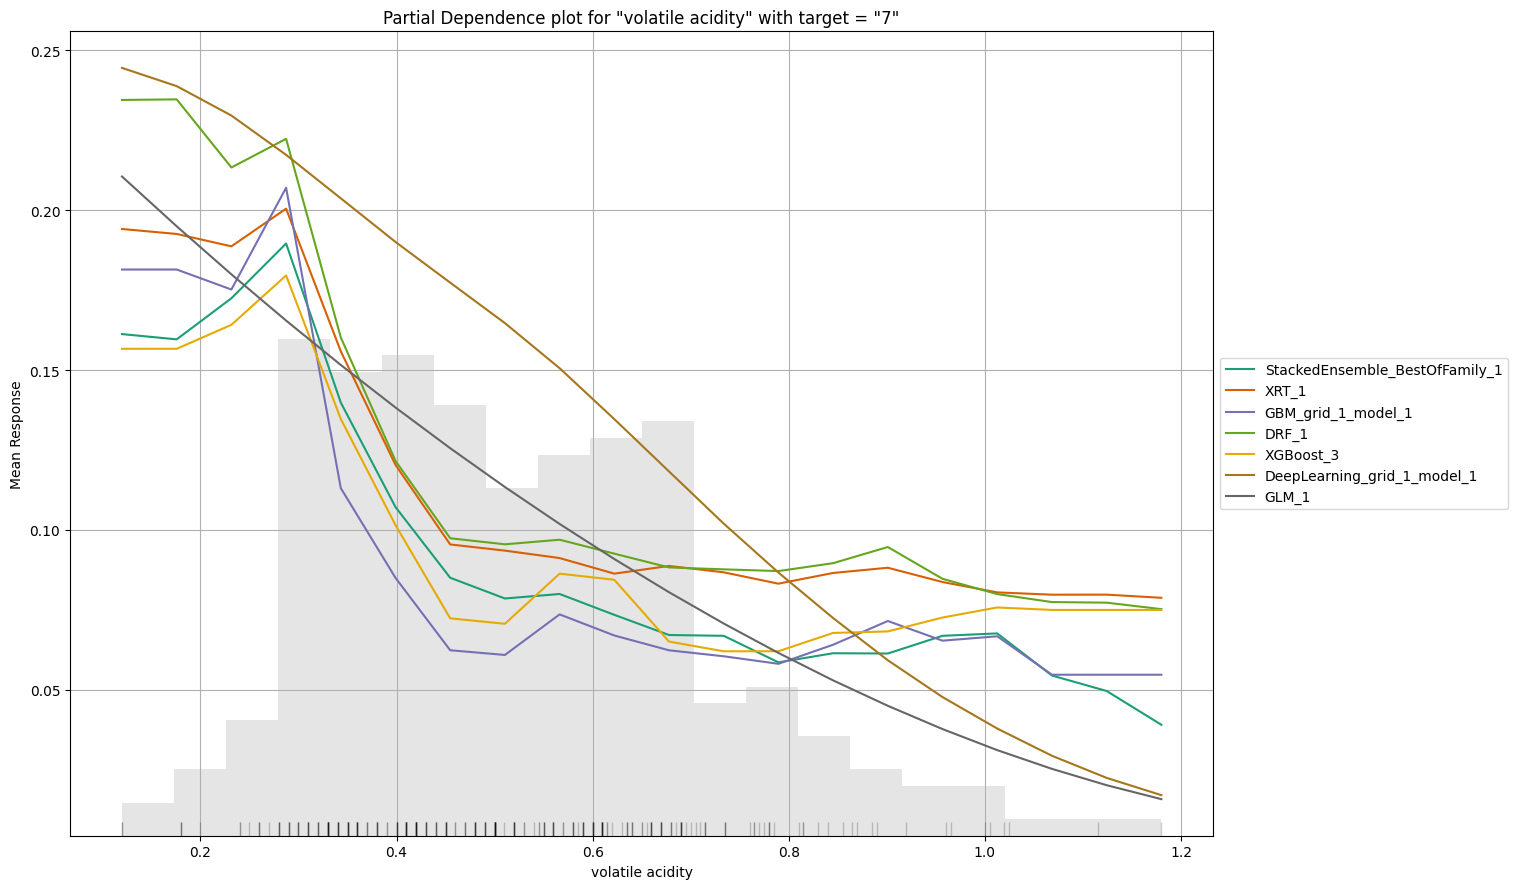

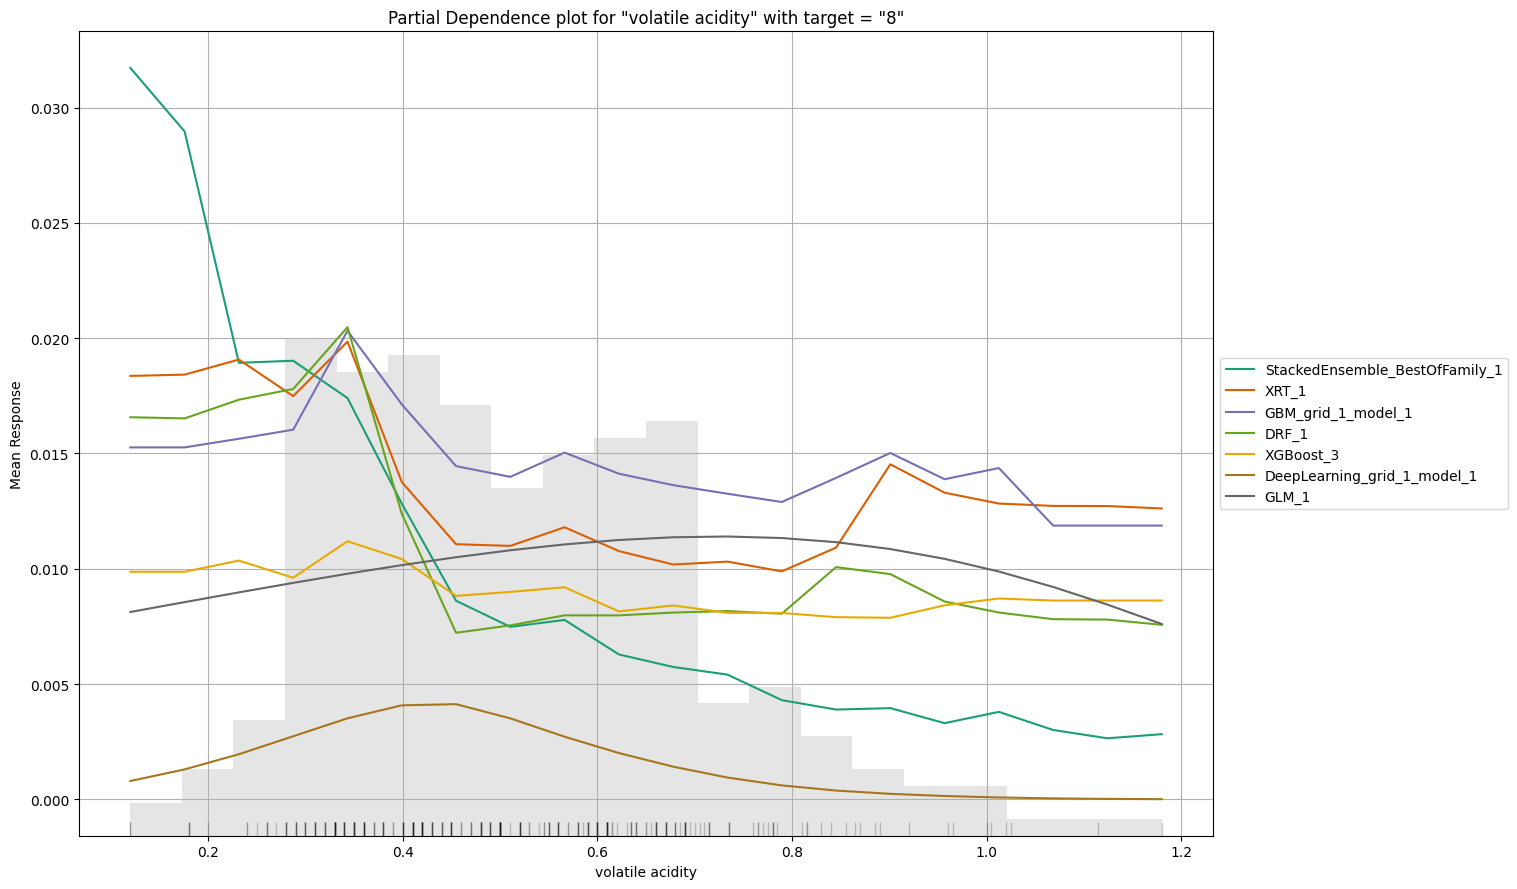

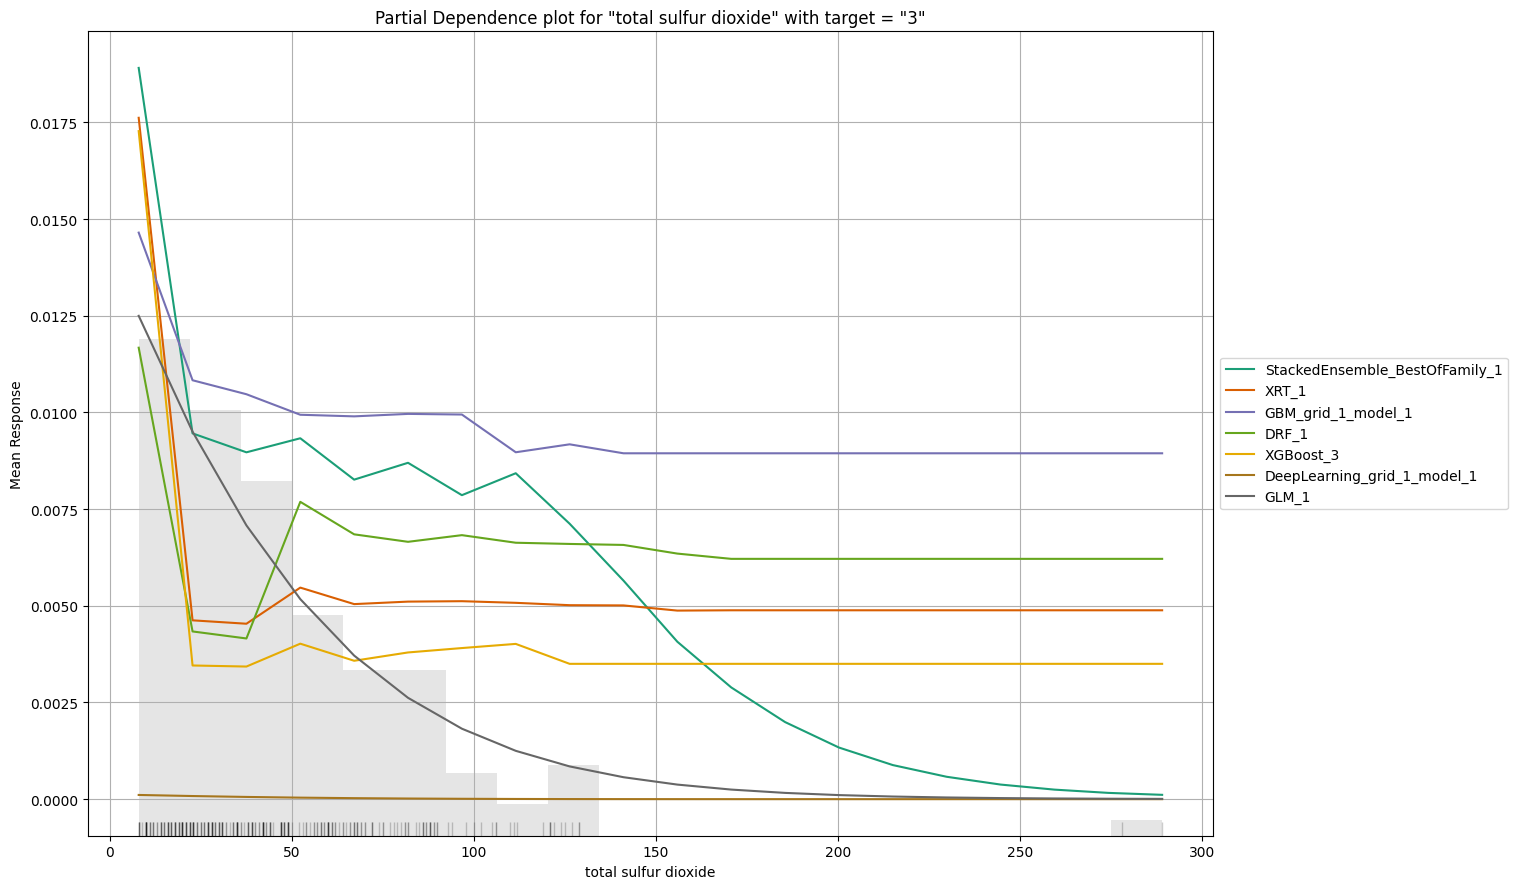

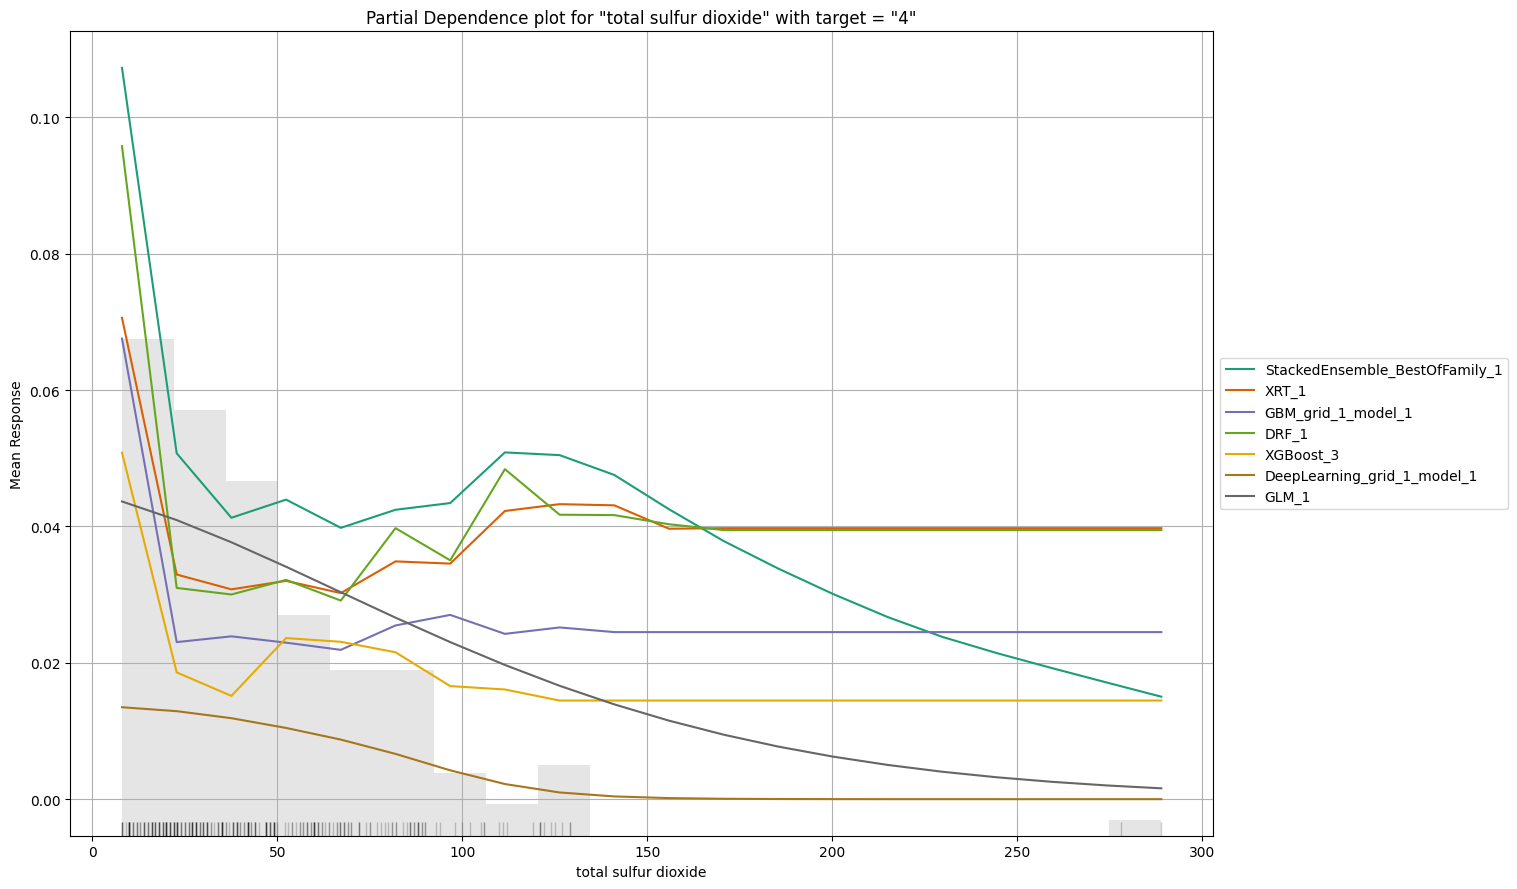

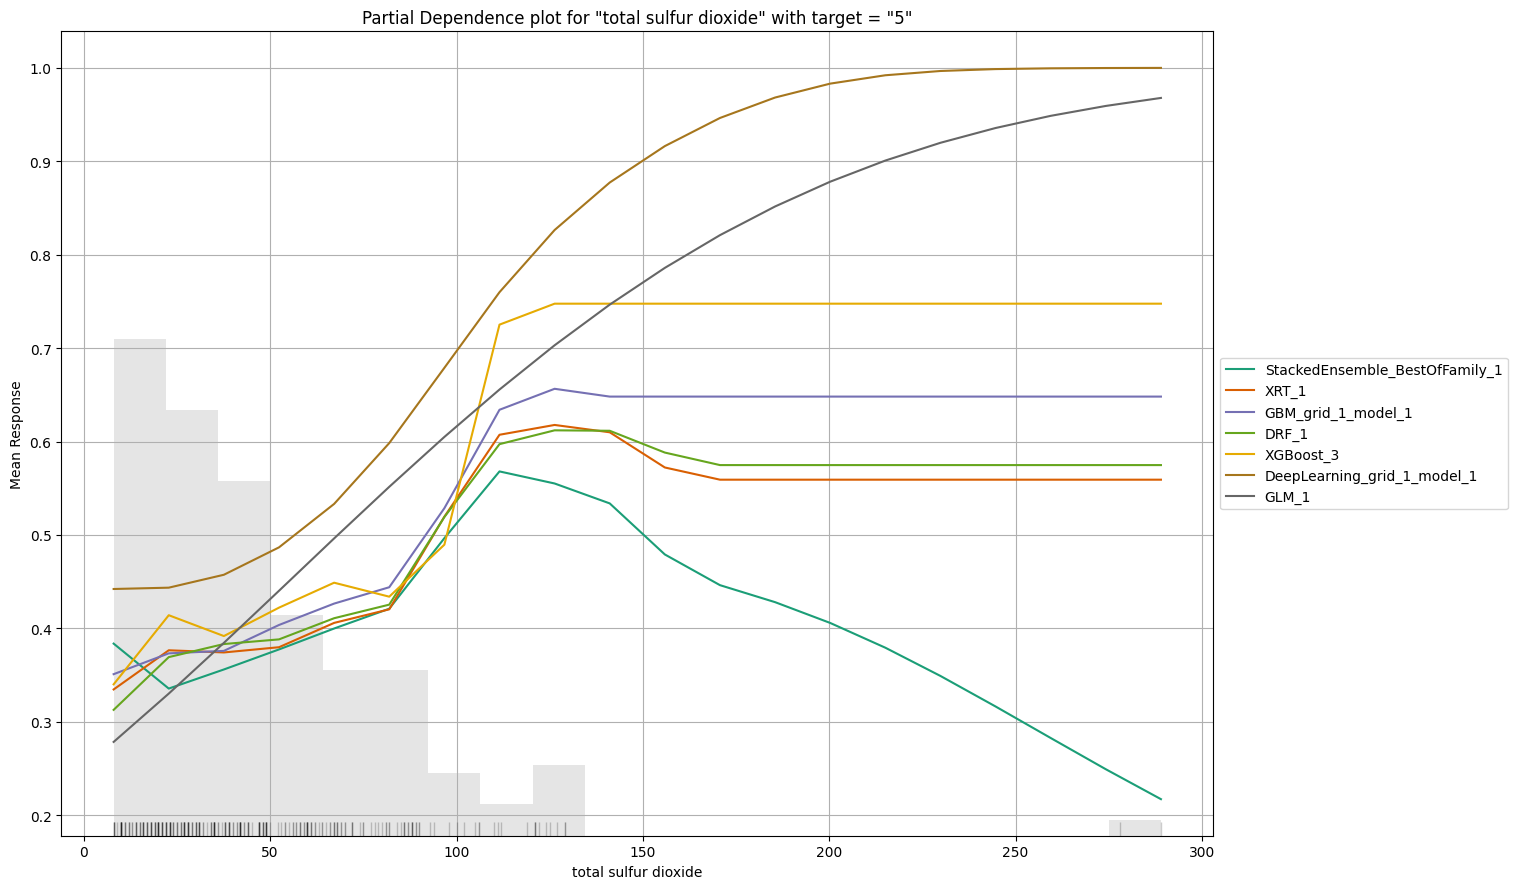

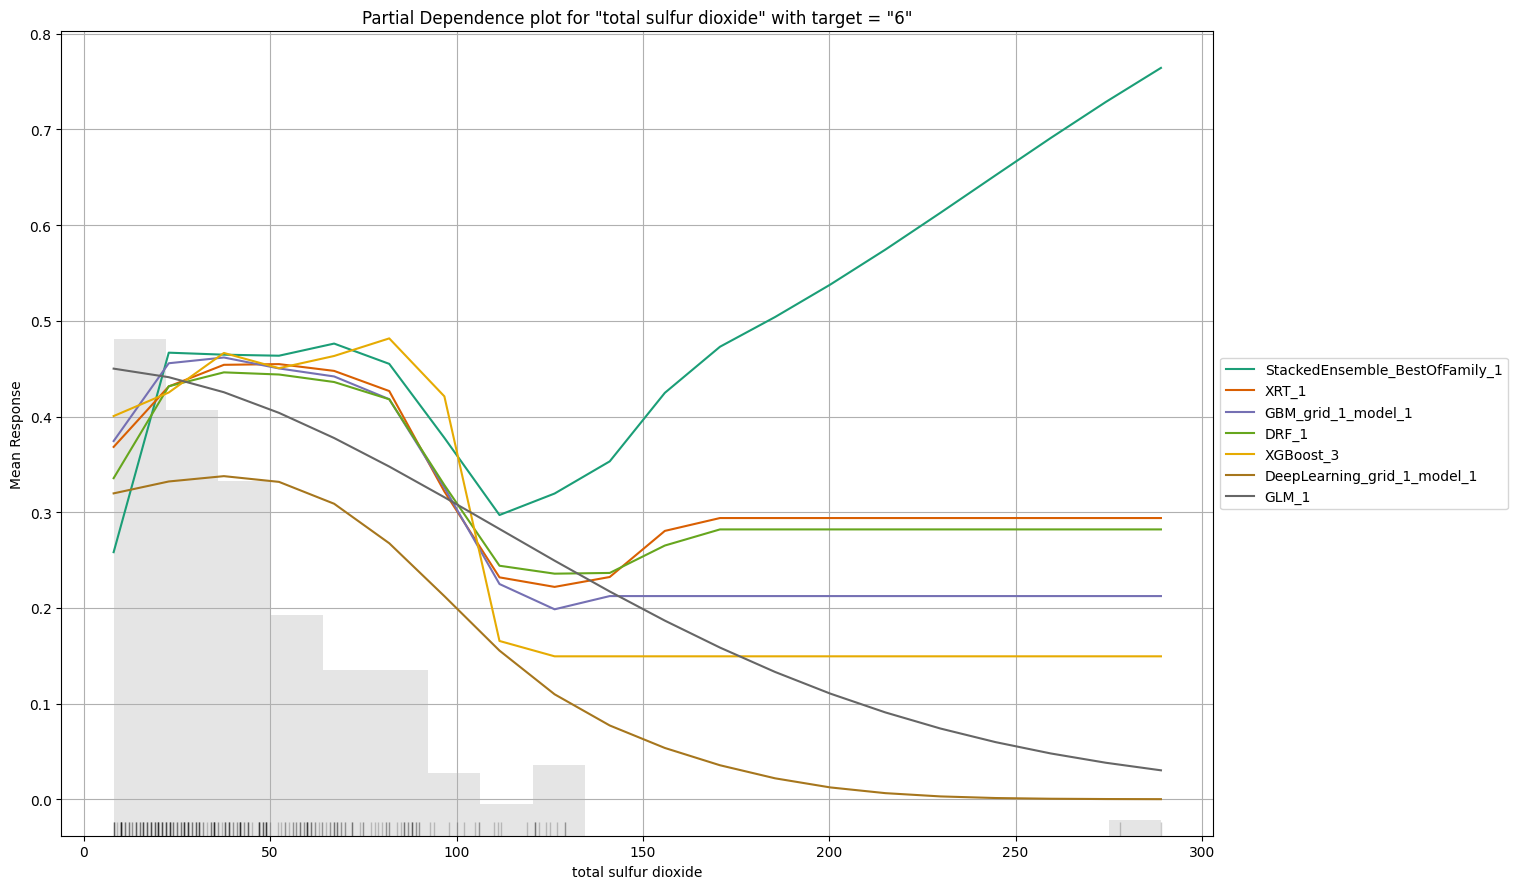

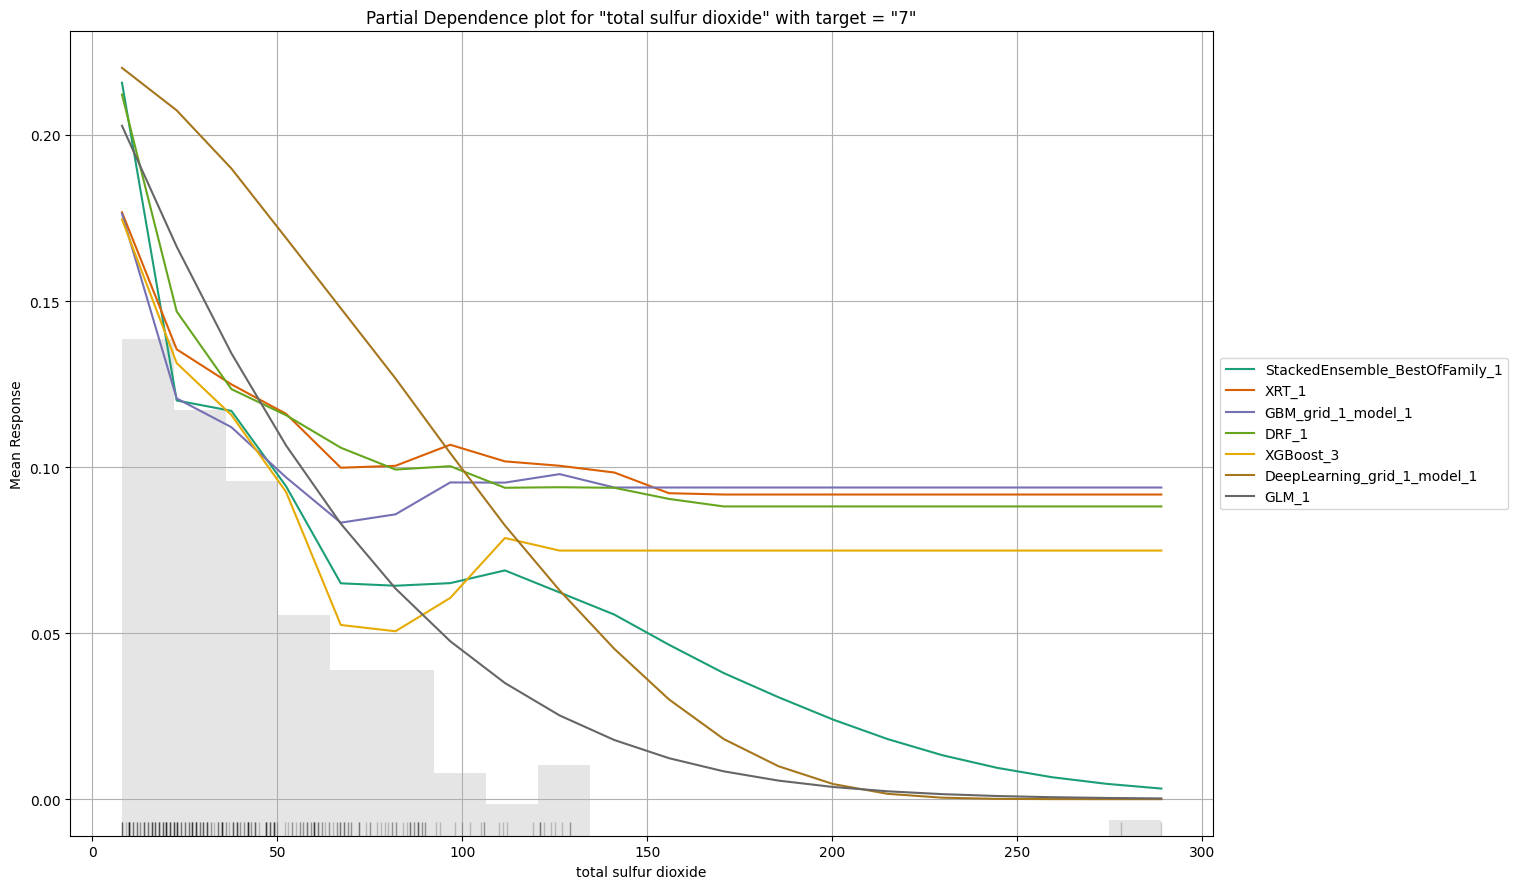

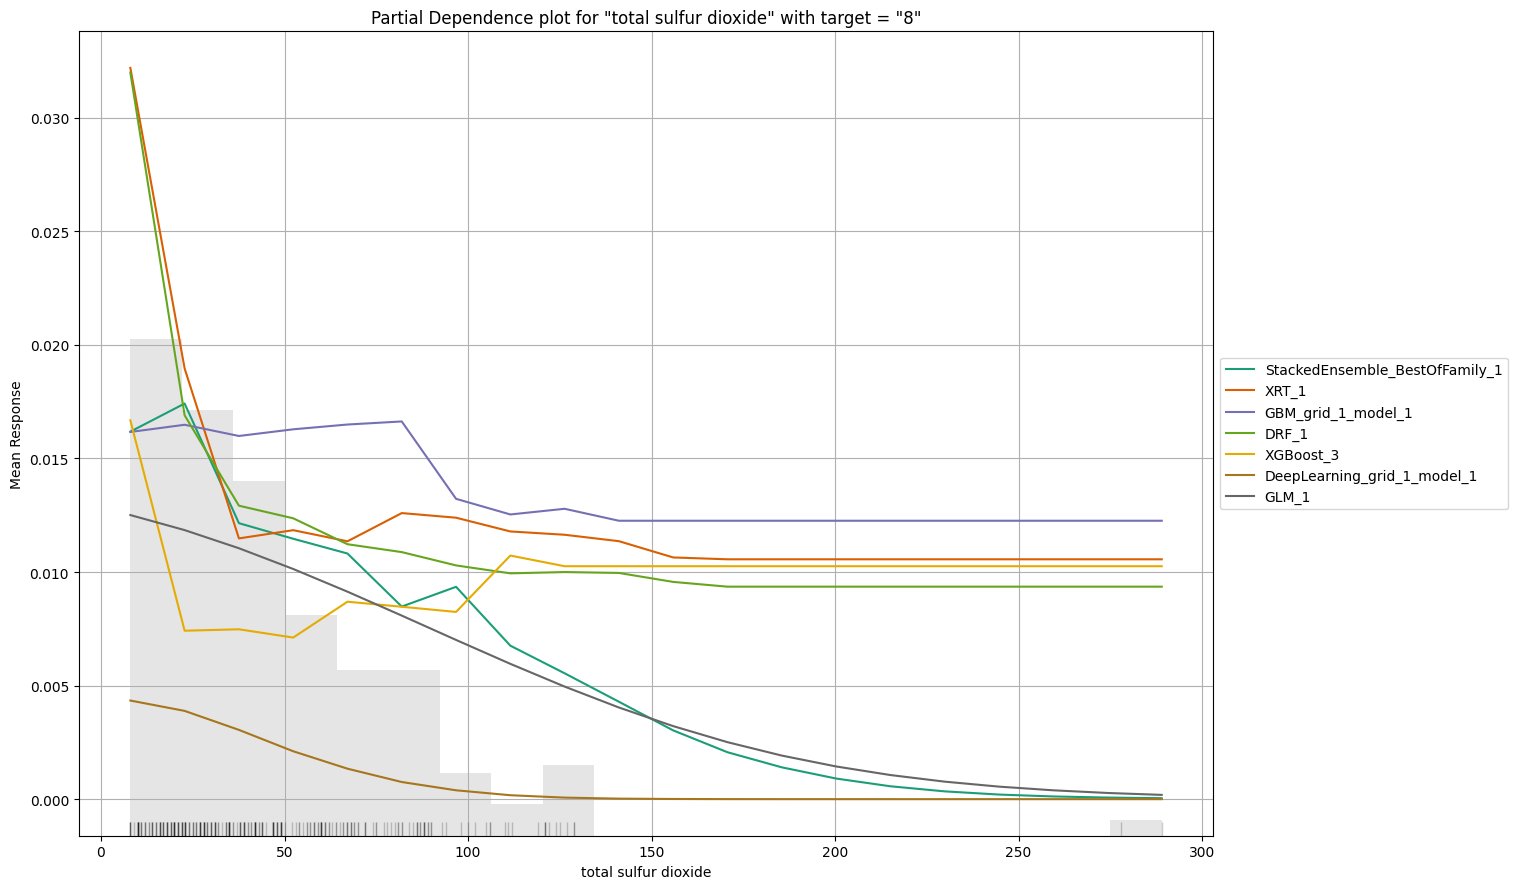

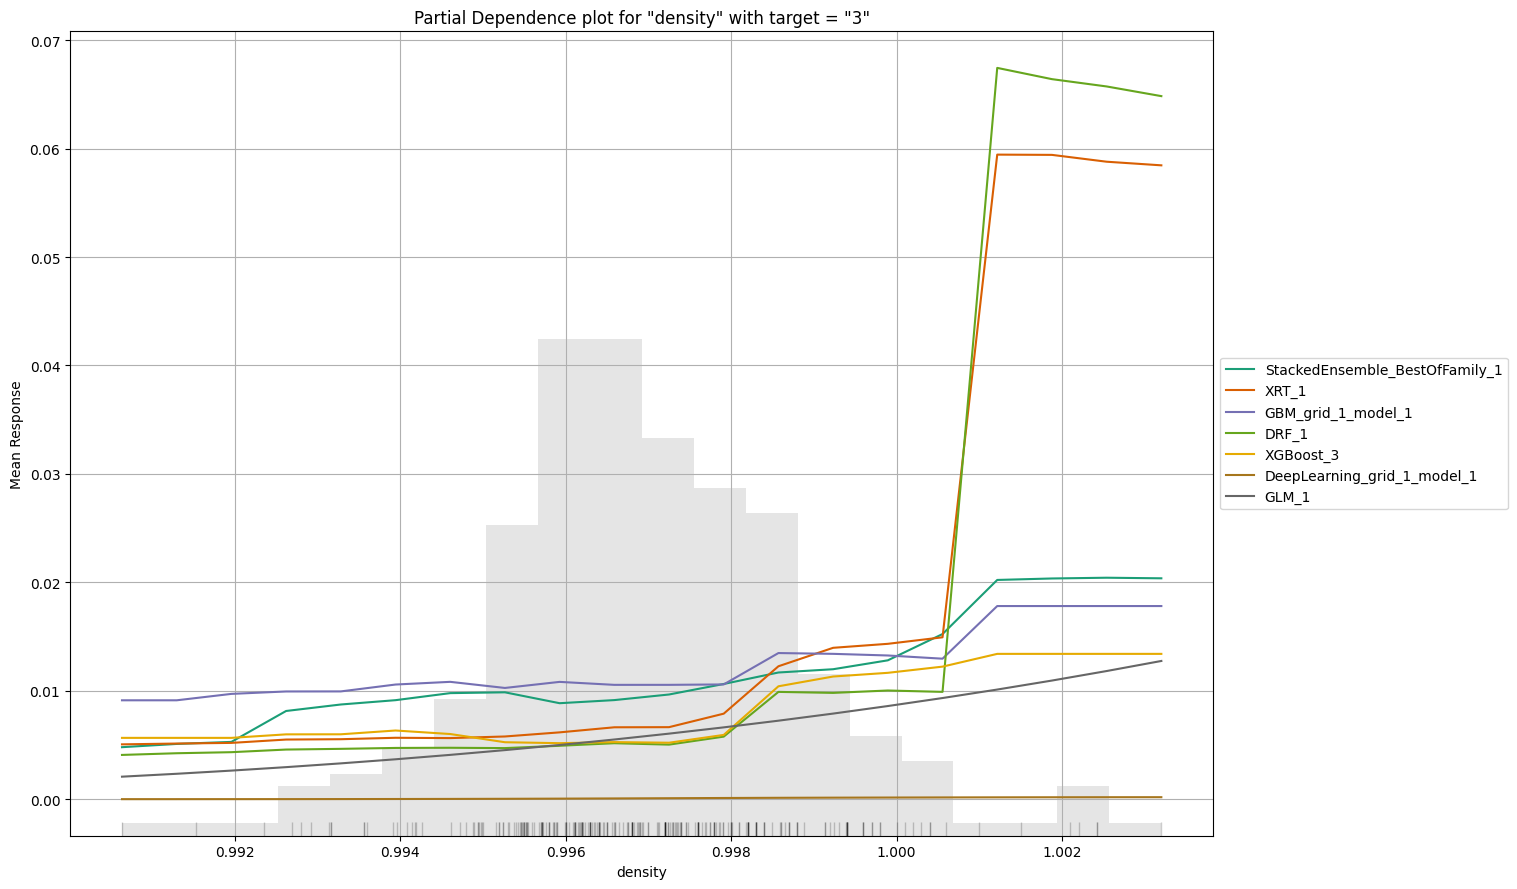

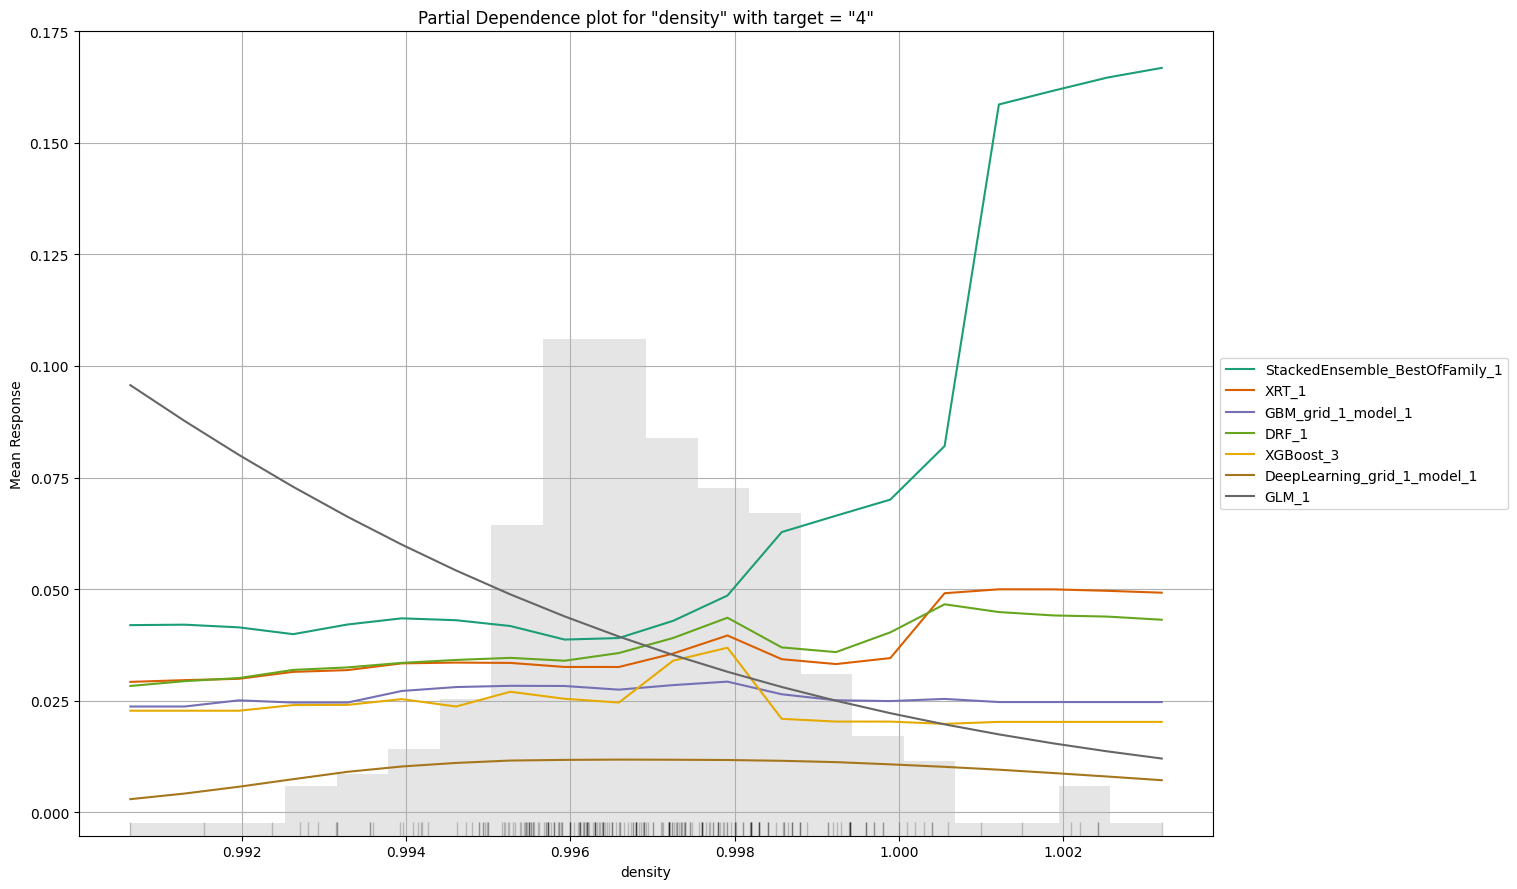

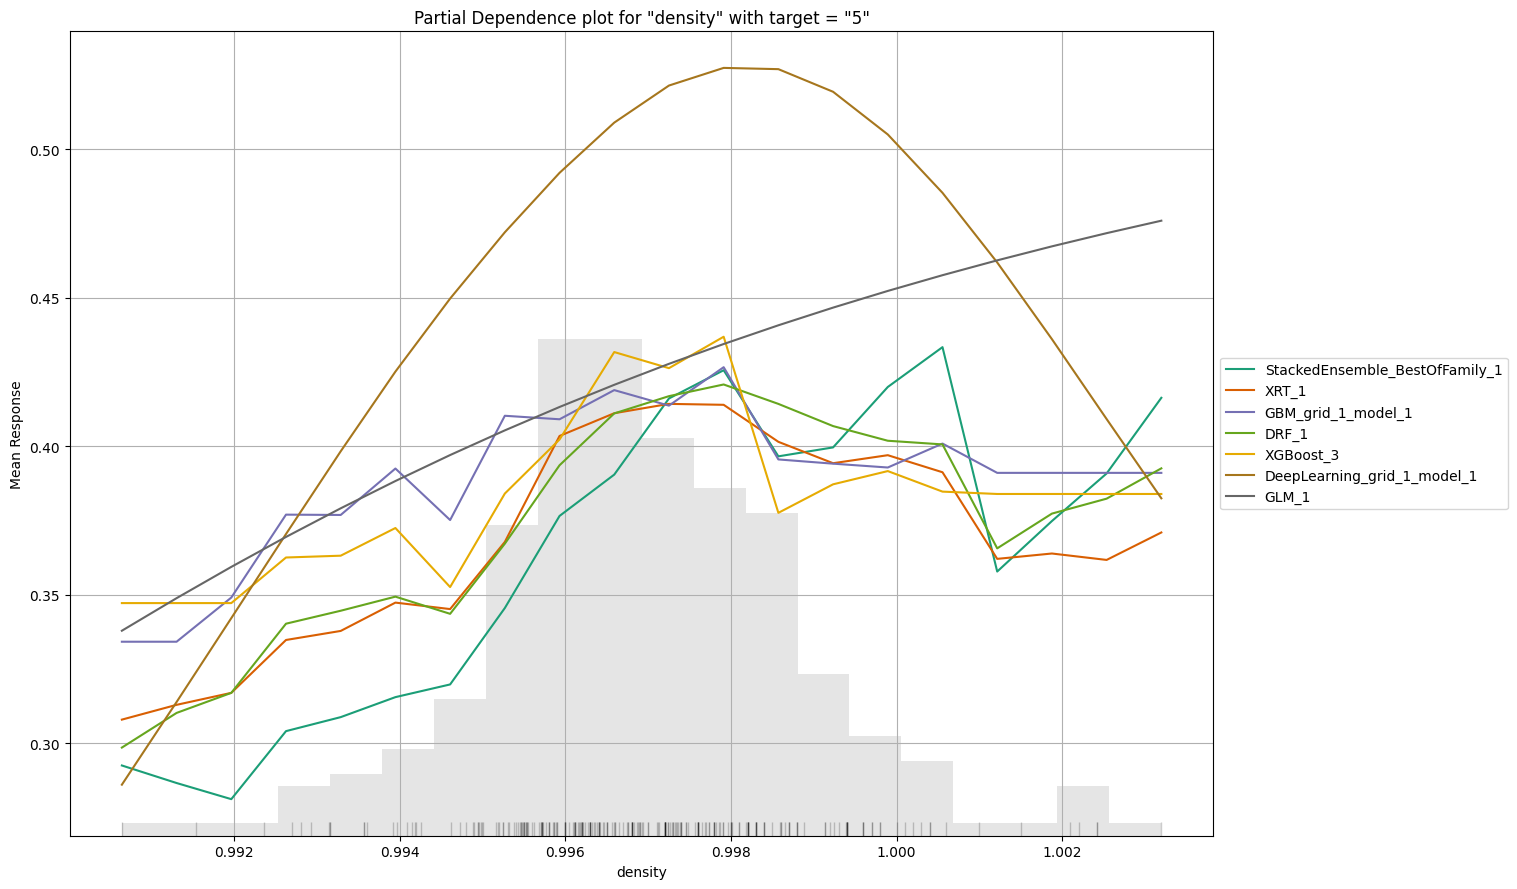

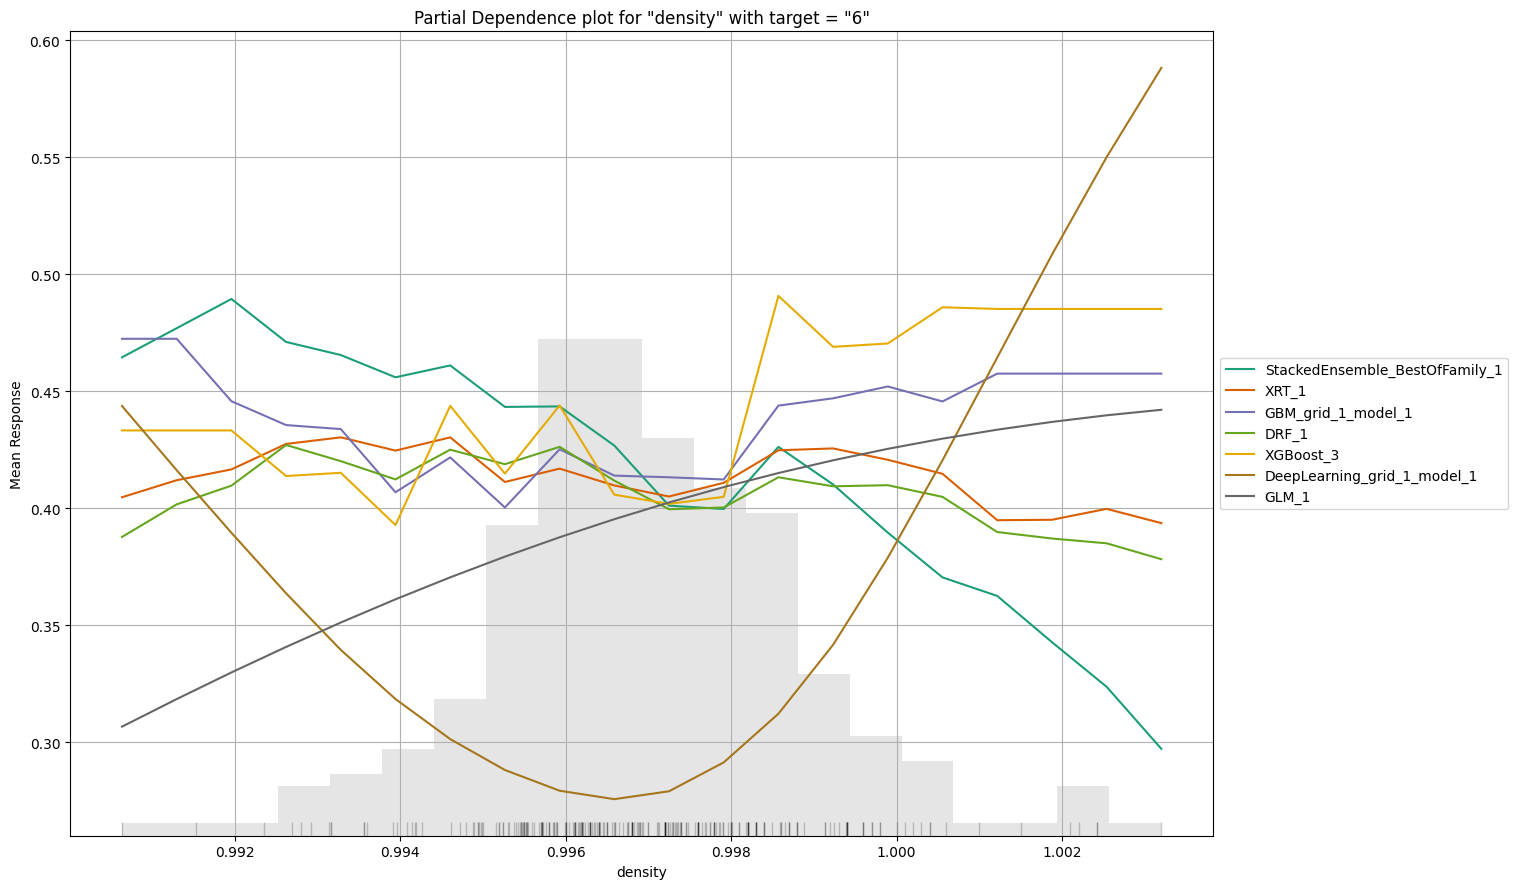

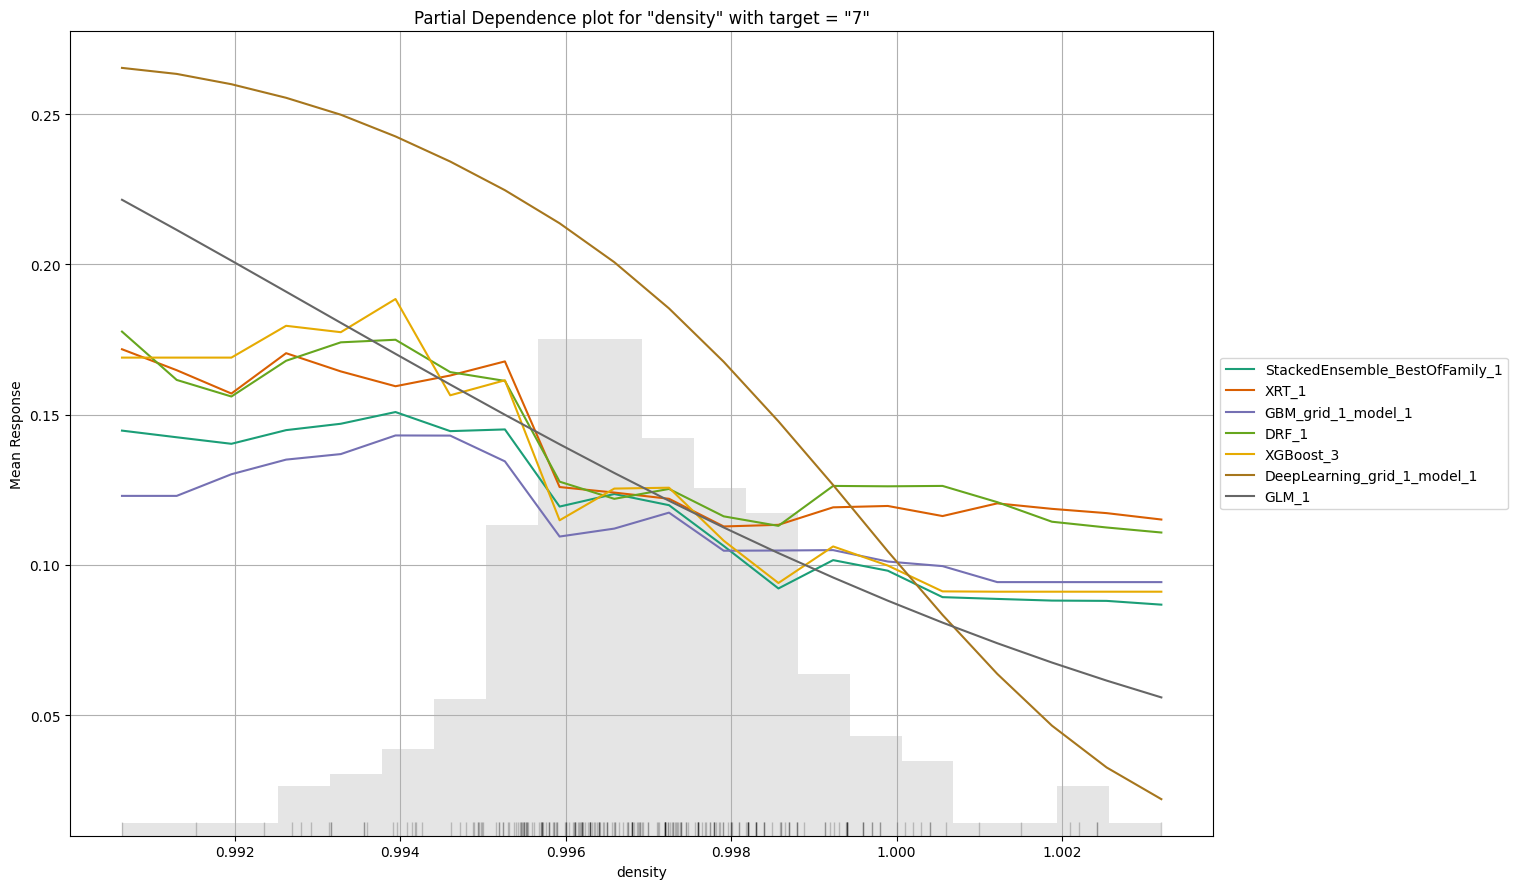

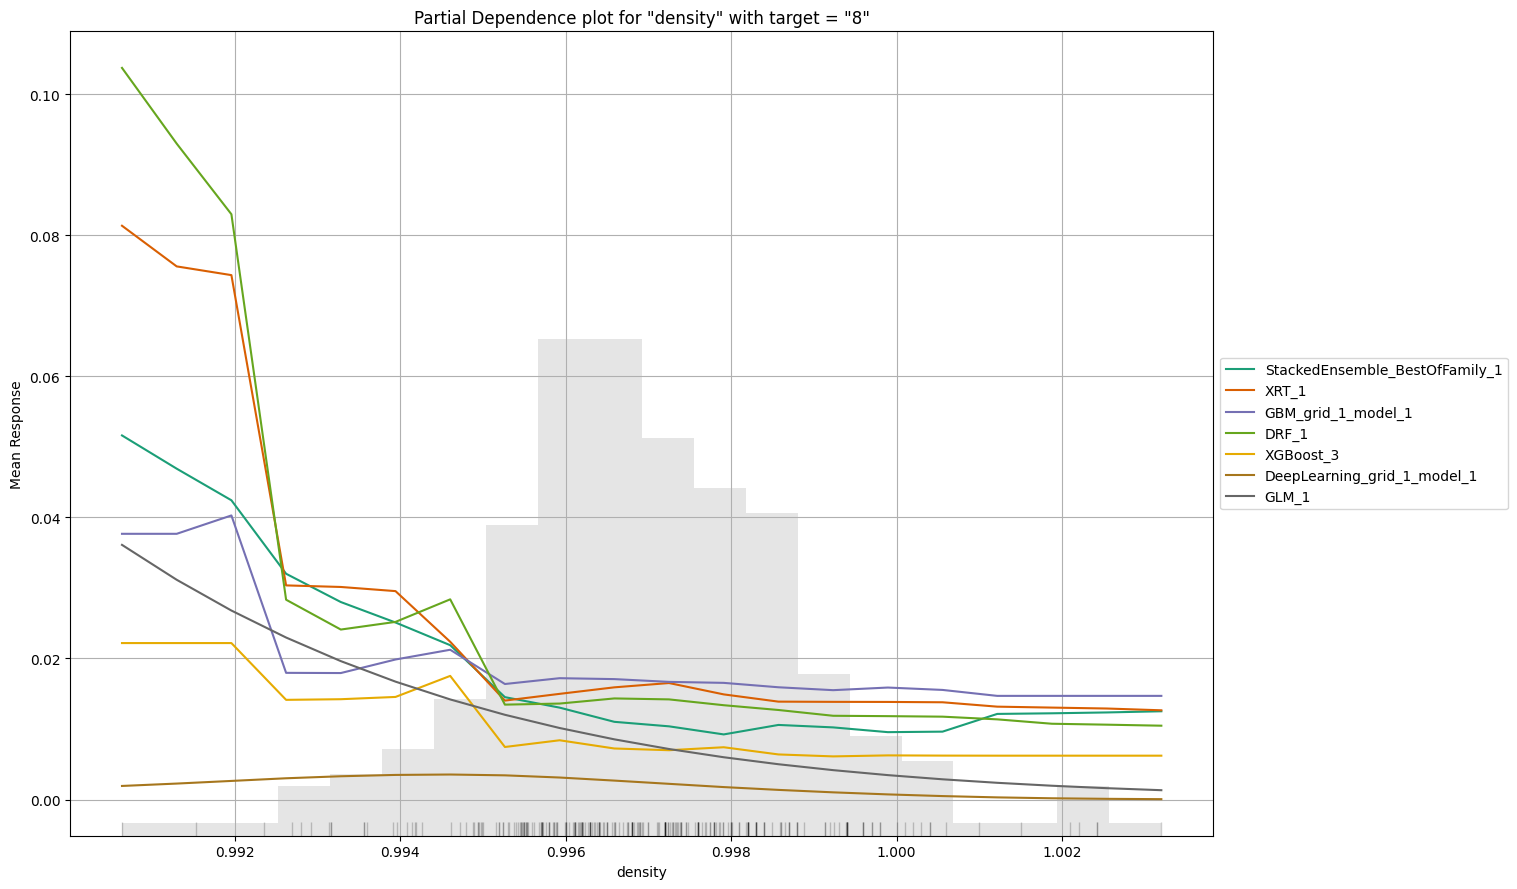

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   mean_per_class_error    logloss      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ----------------------  ---------  --------  --------  ------------------  -------------------------  ---------------
GBM_3_AutoML_1_20230825_184438                                         0.443129   0.876302  0.528878  0.279712                1028                   0.177001  GBM
DRF_1_AutoML_1_20230825_184438                                         0.443881   0.92129   0.5213    0.271754                3461                   0.470635  DRF
StackedEnsemble_AllModels_1_AutoML_1_20230825_184438                   0.452018   0.820879  0.52382   0.274388               69718                   1.20646   StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_184438                0.458308   0.84874   0.525708  0.276369               36654                   0.673951  StackedEnsemble
XRT_1_AutoML_1_20230825_184438                                         0.470181   1.02563   0.518822  0.269176                4864                   0.351665  DRF
GBM_4_AutoML_1_20230825_184438                                         0.471445   0.877545  0.52845   0.27926                 1023                   0.285901  GBM
GBM_grid_1_AutoML_1_20230825_184438_model_1                            0.473703   0.853028  0.522704  0.27322                 1138                   0.251545  GBM
GBM_5_AutoML_1_20230825_184438                                         0.483137   0.896605  0.534911  0.286129                1682                   0.179865  GBM
GBM_2_AutoML_1_20230825_184438                                         0.484265   0.876868  0.531457  0.282446                1406                   0.251108  GBM
XGBoost_grid_1_AutoML_1_20230825_184438_model_3                        0.487095   0.883153  0.537528  0.288936                 956                   0.125001  XGBoost
XGBoost_2_AutoML_1_20230825_184438                                     0.491085   0.908303  0.540681  0.292336                 751                   0.02765   XGBoost
XGBoost_3_AutoML_1_20230825_184438                                     0.491906   0.899996  0.535214  0.286454                 589                   0.03122   XGBoost
GBM_grid_1_AutoML_1_20230825_184438_model_2                            0.497086   0.876491  0.541952  0.293712                1029                   0.280538  GBM
GLM_1_AutoML_1_20230825_184438                                         0.5079     0.947866  0.56317   0.31716                 1686                   0.005468  GLM
XGBoost_grid_1_AutoML_1_20230825_184438_model_2                        0.522991   0.913114  0.558848  0.312311                 449                   0.019432  XGBoost
XGBoost_1_AutoML_1_20230825_184438                                     0.525866   0.883357  0.542614  0.29443                 5034                   0.061706  XGBoost
DeepLearning_grid_3_AutoML_1_20230825_184438_model_1                   0.536143   1.05826   0.57091   0.325938               34561                   0.11516   DeepLearning
DeepLearning_1_AutoML_1_20230825_184438                                0.537521   1.01964   0.583846  0.340876                 210                   0.009135  DeepLearning
DeepLearning_grid_1_AutoML_1_20230825_184438_model_1                   0.54309    1.16887   0.567752  0.322342               20064                   0.011548  DeepLearning
DeepLearning_grid_2_AutoML_1_20230825_184438_model_1                   0.544731   1.0265    0.567351  0.321887               26220                   0.058236  DeepLearning
[20 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_184438

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
3    4    5    6    7    8    Error     Rate
---  ---  ---  ---  ---  ---  --------  --------
0    0    0    0    0    0    nan       0 / 0
0    2    3    1    0    0    0.666667  4 / 6
0    2    79   25   0    0    0.254717  27 / 106
0    1    22   71   6    0    0.29      29 / 100
0    0    1    20   18   0    0.538462  21 / 39
0    0    0    3    1    0    1         4 / 4
0    5    105  120  25   0    0.333333  85 / 255

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [ ]:
# explain the model
exm = model.explain(test)
exm